In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

from warnings import simplefilter
simplefilter("ignore")

plt.style.use("seaborn-whitegrid")

plt.rc(
    "figure",
    autolayout = True,
    figsize = (9, 5),
)

plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 16,
    titlepad = 10,
)

plot_params = dict(
    color = "0.75",
    style = ".-",
    markeredgecolor = "0.25",
    markerfacecolor = "0.25",
)

%config InlineBackend.figure_format = 'retina'

# EDA for number of orders forecast

In [3]:
dtype = {
    'num_orders': 'float64',
}

d1 = pd.read_csv(r'C:\Users\pohlp\Downloads\Neo team hiring home task\taxi.csv', dtype = dtype, index_col = "datetime", parse_dates = ["datetime"])
d1 = d1.sort_index()

d1["Date"] = d1.index.floor(freq='1h')
d1 = d1.groupby("Date").num_orders.sum().to_frame()
d1["Month"] = d1.index.month
d1["Day"] = d1.index.day
d1["Hour"] = d1.index.hour

d1.head()

num_orders  Month  Day  Hour
Date                                             
2018-01-03 00:00:00       124.0      1    3     0
2018-01-03 01:00:00        85.0      1    3     1
2018-01-03 02:00:00        71.0      1    3     2
2018-01-03 03:00:00        66.0      1    3     3
2018-01-03 04:00:00        43.0      1    3     4

In [4]:
import math
d1["weekday"] = d1.index.weekday
d1["weekday_sin"] = d1.index.weekday.map(lambda x: math.sin((x+1)*2*math.pi/7))
d1["weekday_cos"] = d1.index.weekday.map(lambda x: math.cos((x+1)*2*math.pi/7))
d1.head()

num_orders  Month  Day  Hour  weekday  weekday_sin  \
Date                                                                      
2018-01-03 00:00:00       124.0      1    3     0        2     0.433884   
2018-01-03 01:00:00        85.0      1    3     1        2     0.433884   
2018-01-03 02:00:00        71.0      1    3     2        2     0.433884   
2018-01-03 03:00:00        66.0      1    3     3        2     0.433884   
2018-01-03 04:00:00        43.0      1    3     4        2     0.433884   

                     weekday_cos  
Date                              
2018-01-03 00:00:00    -0.900969  
2018-01-03 01:00:00    -0.900969  
2018-01-03 02:00:00    -0.900969  
2018-01-03 03:00:00    -0.900969  
2018-01-03 04:00:00    -0.900969

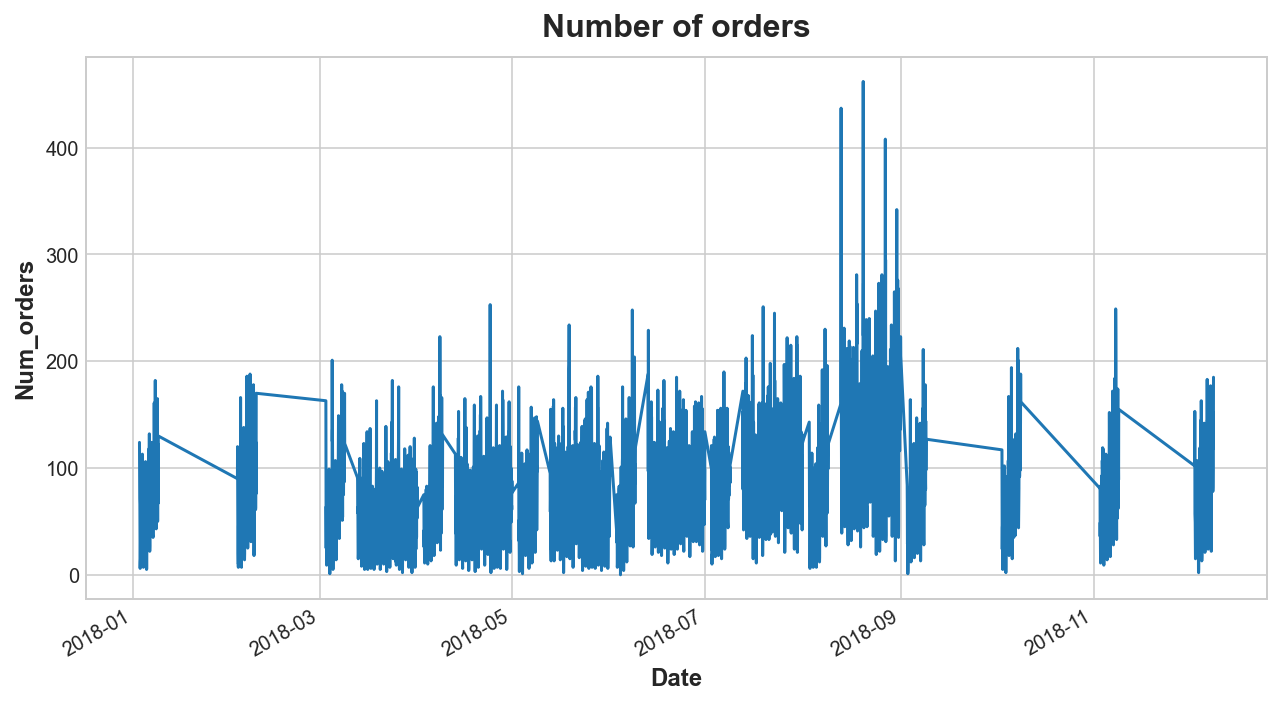

In [5]:
d1.num_orders.plot(title = "Number of orders", ylabel = "Orders");

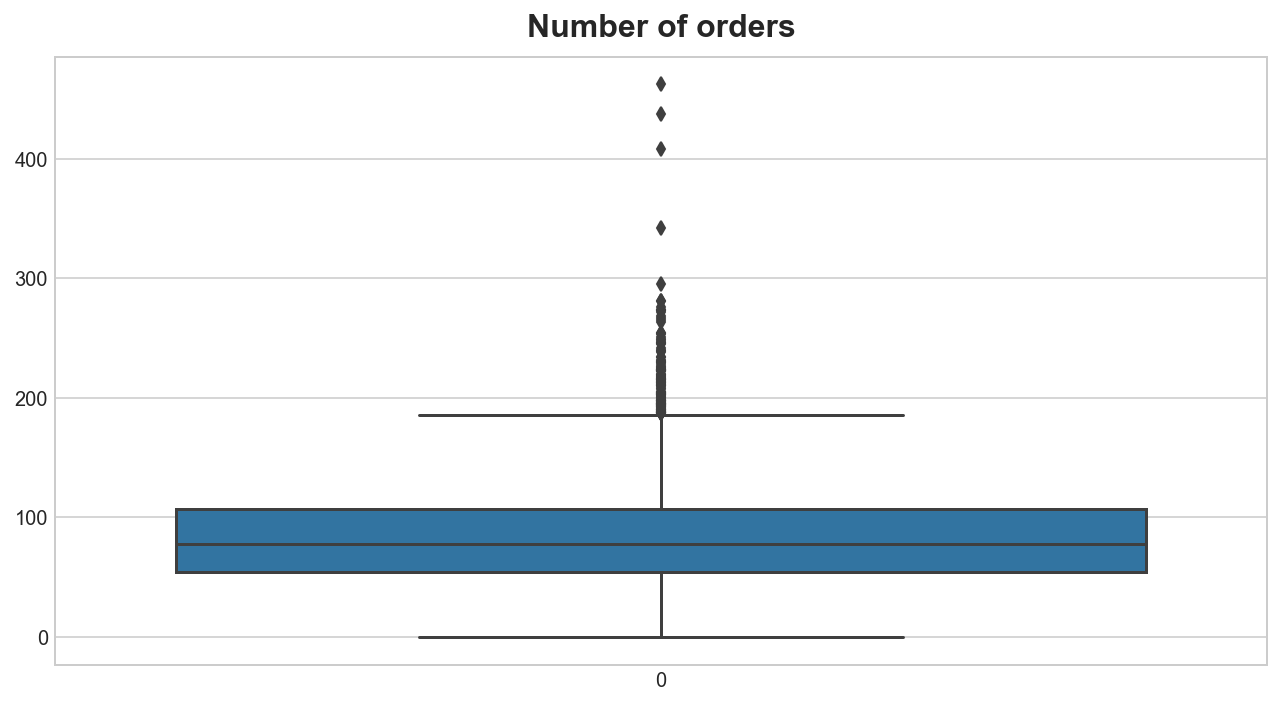

In [210]:
sns.boxplot(data = d1.num_orders)
plt.title('Number of orders');

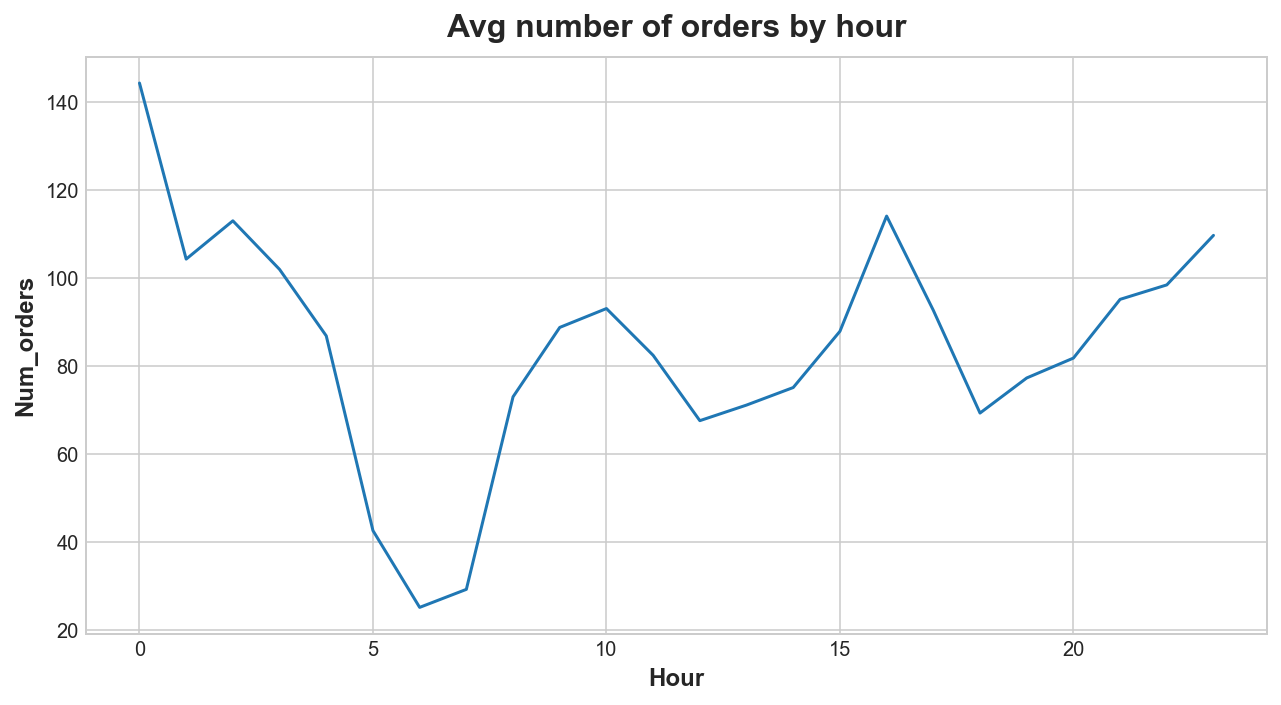

In [6]:
ax = d1.groupby("Hour").num_orders.mean().sort_index().plot(title = "Avg number of orders by hour", ylabel = "Orders");
#plt.savefig('global_cust_int.png', bbox_inches = 'tight')

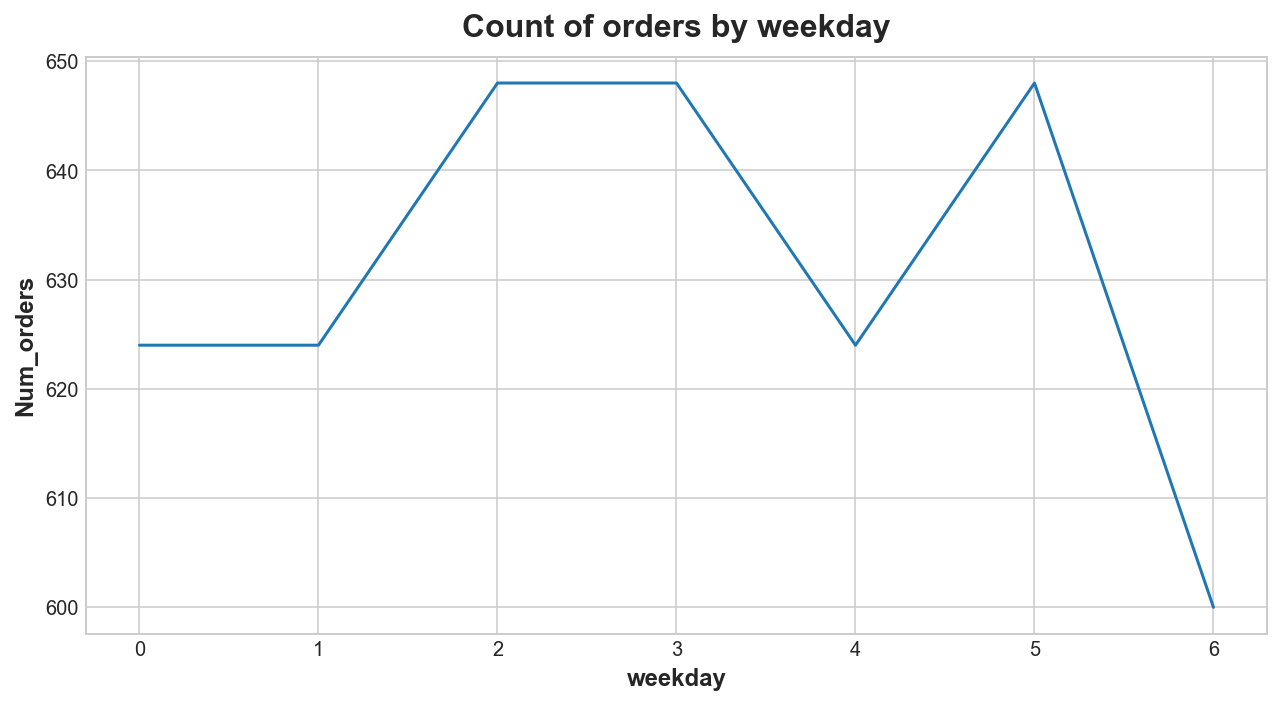

In [7]:
ax = d1.groupby("weekday").num_orders.count().sort_index().plot(title = "Count of orders by weekday", ylabel = "Orders");

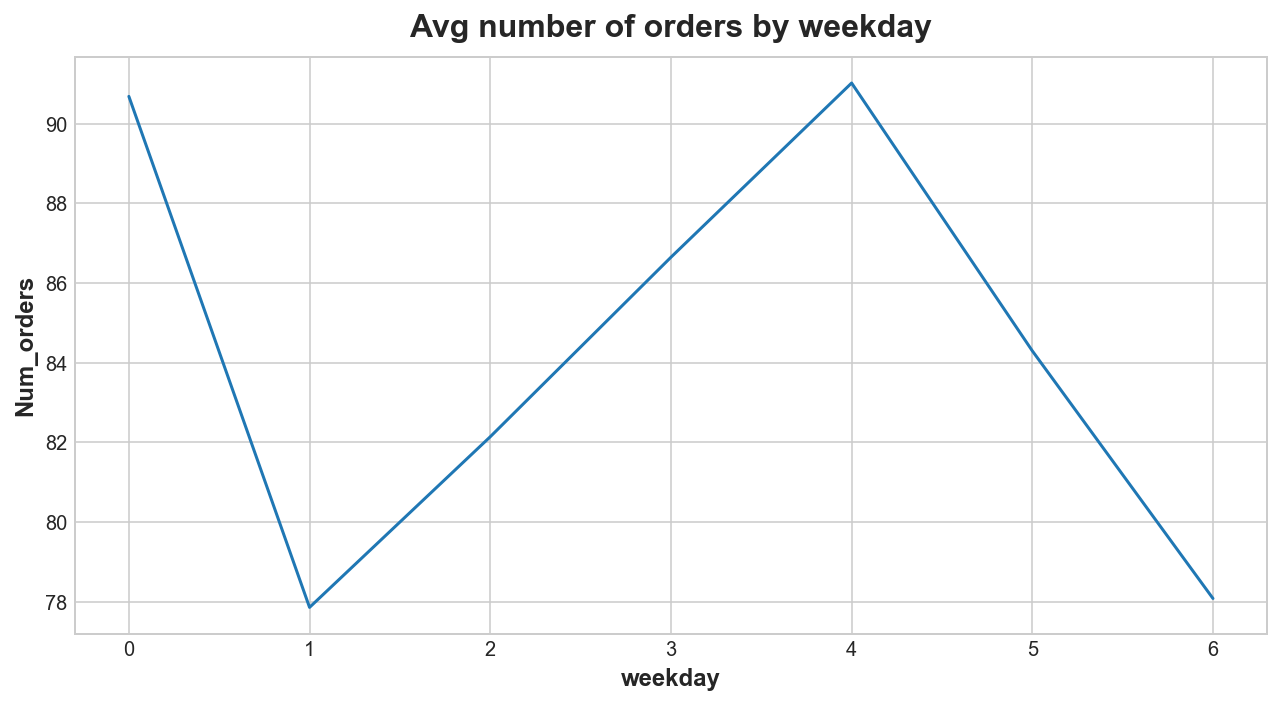

In [8]:
ax = d1.groupby("weekday").num_orders.mean().sort_index().plot(title = "Avg number of orders by weekday", ylabel = "Orders");

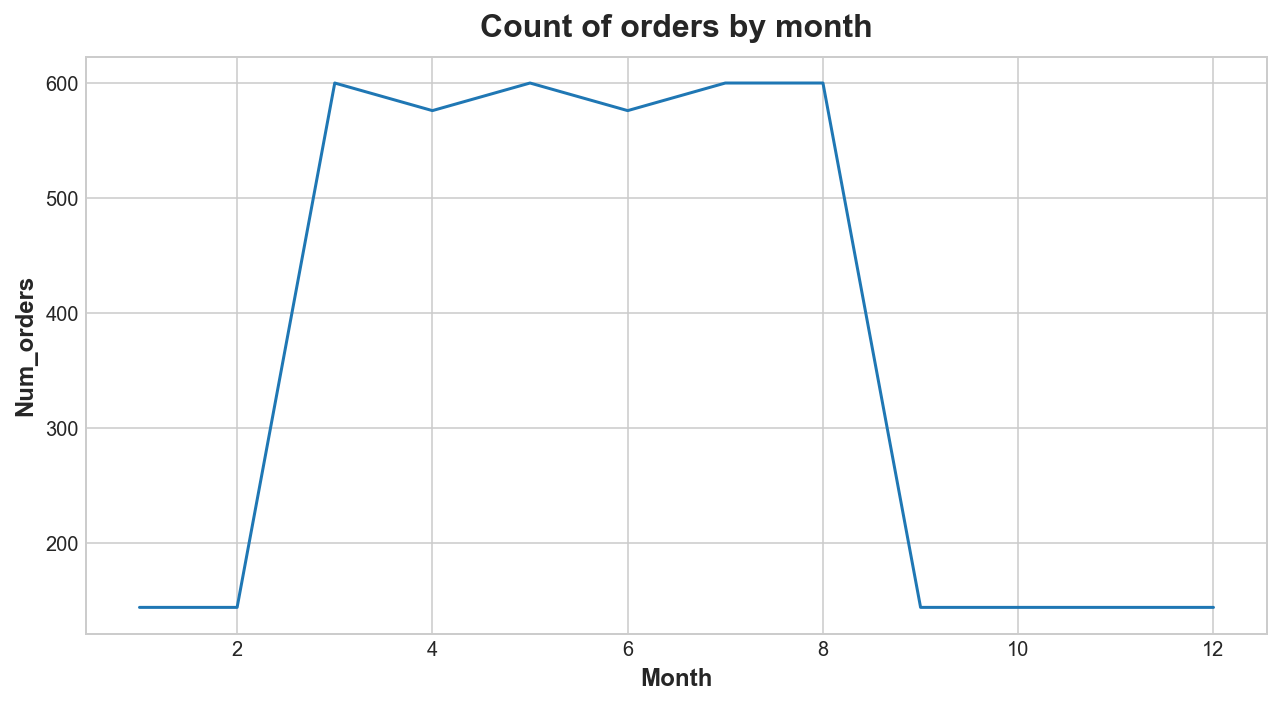

In [9]:
ax = d1.groupby("Month").num_orders.count().sort_index().plot(title = "Count of orders by month", ylabel = "Orders");
#plt.savefig('global_cust_int.png', bbox_inches = 'tight')

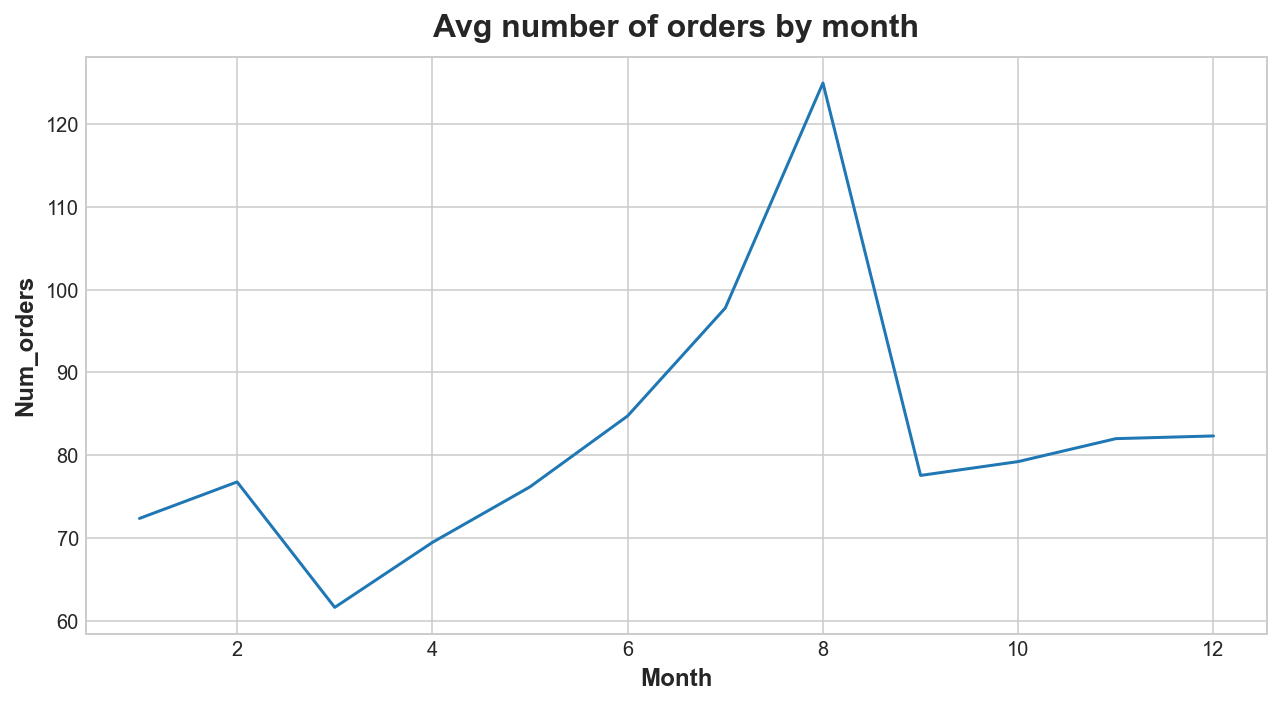

In [10]:
ax = d1.groupby("Month").num_orders.mean().sort_index().plot(title = "Avg number of orders by month", ylabel = "Orders");
#plt.savefig('global_cust_int.png', bbox_inches = 'tight')

In [11]:
ax = d1.groupby("Day").num_orders.count().sort_index().plot(title = "Count of orders by day of month", ylabel = "Orders");
#plt.savefig('global_cust_int.png', bbox_inches = 'tight')

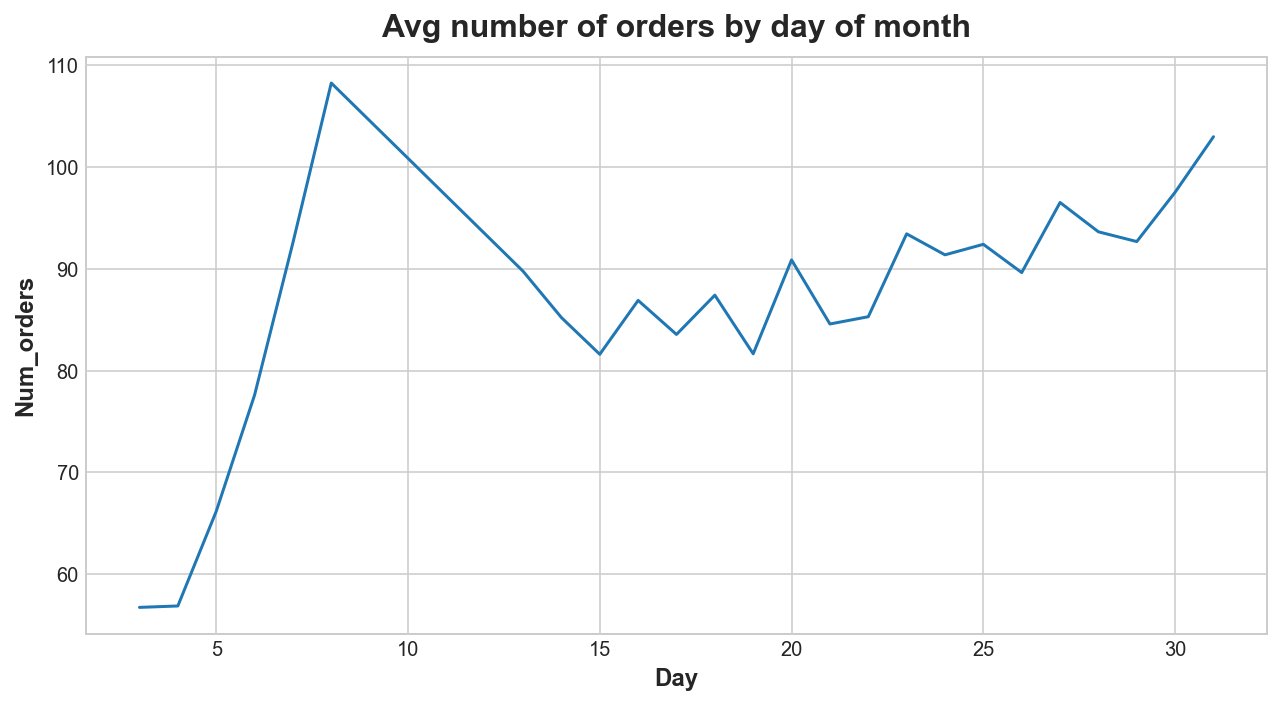

In [12]:
ax = d1.groupby("Day").num_orders.mean().sort_index().plot(title = "Avg number of orders by day of month", ylabel = "Orders");
#plt.savefig('global_cust_int.png', bbox_inches = 'tight')

# Heuristics based model

In [126]:
d1_lt = pd.DataFrame(d1.groupby("Date").num_orders.sum())
d1_lt["Month"] = d1_lt.index.month
d1_lt["Hour"] = d1_lt.index.hour
d1_lt["weekday"] = d1_lt.index.weekday
#d1_lt["weekday_sin"] = d1_lt.index.weekday.map(lambda x: math.sin((x+1)*2*math.pi/7))
#d1_lt["weekday_cos"] = d1_lt.index.weekday.map(lambda x: math.cos((x+1)*2*math.pi/7))
#d1_lt["hour_sin"] = d1_lt.index.Hour.map(lambda x: math.sin((x+1)*2*math.pi/24))
#d1_lt["hour_cos"] = d1_lt.index.Hour.map(lambda x: math.cos((x+1)*2*math.pi/24))

In [127]:
d1_lt["Lag_1"] = d1_lt.num_orders.shift(1)
d1_lt["Lag_24"] = d1_lt.num_orders.shift(24)
d1_lt["Lag_48"] = d1_lt.num_orders.shift(48)
d1_lt["Avg_group"] = d1_lt.groupby(["weekday", "Hour"]).num_orders.transform(lambda x: x.rolling(52, 1).mean().shift(1))
d1_lt["Prev_group"] = d1_lt.groupby(["weekday", "Hour"]).num_orders.apply(lambda x: x.shift(1))
d1_lt["Prev_group2"] = d1_lt.groupby(["weekday", "Hour"]).num_orders.apply(lambda x: x.shift(2))
d1_lt["Prev_group3"] = d1_lt.groupby(["weekday", "Hour"]).num_orders.apply(lambda x: x.shift(3))
#d1_lt.dropna(inplace = True)

num_orders  Month  Hour  weekday  Lag_1  Lag_24  Lag_48  \
Date                                                                           
2018-01-03 01:00:00        85.0      1     1        2  124.0     NaN     NaN   
2018-01-04 01:00:00        42.0      1     1        3   85.0    85.0     NaN   
2018-01-05 01:00:00        74.0      1     1        4   81.0    42.0    85.0   
2018-01-06 01:00:00        77.0      1     1        5  118.0    74.0    42.0   
2018-01-07 01:00:00        84.0      1     1        6  104.0    77.0    74.0   

                     Prev_group  Avg_group  Prev_group2  Prev_group3  
Date                                                                  
2018-01-03 01:00:00         NaN        NaN          NaN          NaN  
2018-01-04 01:00:00         NaN        NaN          NaN          NaN  
2018-01-05 01:00:00         NaN        NaN          NaN          NaN  
2018-01-06 01:00:00         NaN        NaN          NaN          NaN  
2018-01-07 01:00:00         NaN        NaN          NaN          NaN

num_orders         Month          Hour       weekday     Lag_1  \
num_orders     1.000000  2.373206e-01 -1.492838e-04 -1.395373e-02  0.616357   
Month          0.237321  1.000000e+00  2.659186e-16 -5.221583e-02  0.236959   
Hour          -0.000149  2.659186e-16  1.000000e+00 -4.403032e-17 -0.079133   
weekday       -0.013954 -5.221583e-02 -4.403032e-17  1.000000e+00 -0.018686   
Lag_1          0.616357  2.369592e-01 -7.913255e-02 -1.868639e-02  1.000000   
Lag_24         0.631268  2.401857e-01  2.508738e-03  1.720190e-02  0.515071   
Lag_48         0.584470  2.347047e-01  2.604453e-03 -1.024769e-02  0.461869   
Prev_group     0.570777  2.855946e-01 -9.983187e-04 -2.880145e-02  0.400773   
Avg_group      0.618793  2.136962e-01  6.450834e-02 -4.791990e-02  0.414674   
Prev_group2    0.487715  3.344416e-01  3.274911e-03 -3.337546e-02  0.342072   
Prev_group3    0.466394  3.852445e-01  4.832529e-03 -4.405295e-02  0.327161   

               Lag_24    Lag_48  Prev_group  Avg_group  Prev_group2  \
num_orders   0.631268  0.584470    0.570777   0.618793     0.487715   
Month        0.240186  0.234705    0.285595   0.213696     0.334442   
Hour         0.002509  0.002604   -0.000998   0.064508     0.003275   
weekday      0.017202 -0.010248   -0.028801  -0.047920    -0.033375   
Lag_1        0.515071  0.461869    0.400773   0.414674     0.342072   
Lag_24       1.000000  0.624797    0.487660   0.558753     0.451664   
Lag_48       0.624797  1.000000    0.539045   0.584102     0.492796   
Prev_group   0.487660  0.539045    1.000000   0.698440     0.581051   
Avg_group    0.558753  0.584102    0.698440   1.000000     0.722549   
Prev_group2  0.451664  0.492796    0.581051   0.722549     1.000000   
Prev_group3  0.405755  0.434851    0.490920   0.726907     0.588360   

             Prev_group3  
num_orders      0.466394  
Month           0.385245  
Hour            0.004833  
weekday        -0.044053  
Lag_1           0.327161  
Lag_24          0.405755  
Lag_48          0.434851  
Prev_group      0.490920  
Avg_group       0.726907  
Prev_group2     0.588360  
Prev_group3     1.000000

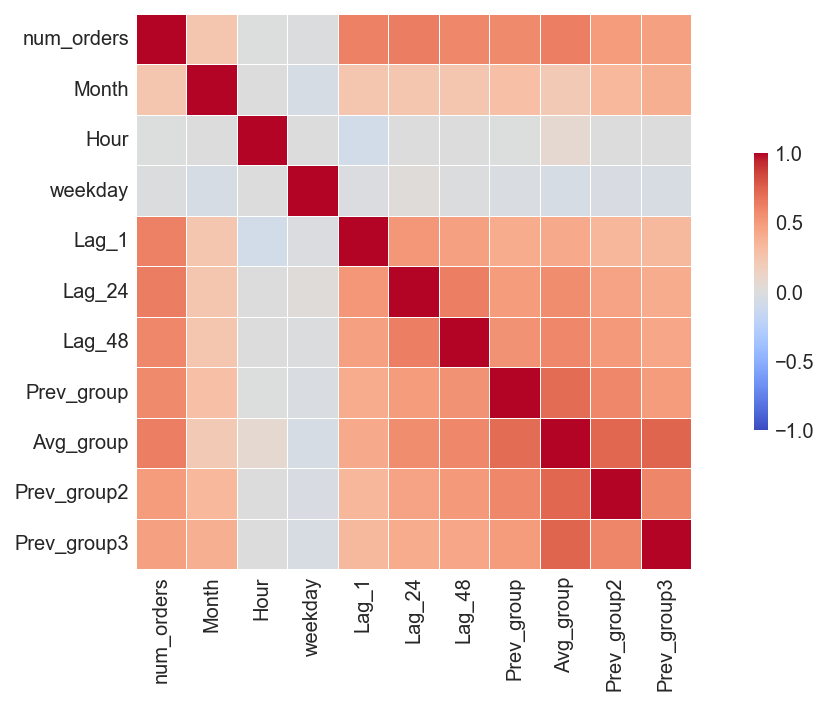

In [199]:
display(d1_lt.corr(method = 'pearson'))
ax = sns.heatmap(d1_lt.corr(method = 'pearson'), vmax = 1, vmin = -1, center = 0,
               square = True, linewidth = 0.5, cbar_kws = {"shrink": 0.5}, annot = False, fmt = ".2f", cmap = "coolwarm");
#plt.savefig('country_int_heatmap.png', bbox_inches = 'tight')

In [128]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

def score_dataset(X, y, model = XGBRegressor(verbosity = 0)):
    '''
    Scores model results for dataset X with target y, using 5-fold stratified cross validation with an accuracy metric
    
    X: Encoded, independent variables
    y: Encoded, dependent variable
    model: Machine learning model used for the dataset
    '''
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    CV = StratifiedKFold(n_splits = 5)
    
    score = cross_val_score(
        model, X, y, cv = CV, scoring = "neg_root_mean_squared_error",
    )
    
    return -score.mean()

In [200]:
def make_mi_scores(X, y):
    '''
    Creat MI scores for the dataset X with response y, using mutual_info_regression
    
    X: independent variables
    y: target variable
    '''
    
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores


def plot_mi_scores(scores):
    '''
    Plot the MI scores in decreasing order
    
    scores: MI scores of the features
    '''
    
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.savefig('4_MI.png', bbox_inches = 'tight')
    plt.show()

In [201]:
X = d1_lt.copy()
y = X.pop("num_orders")

mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

In [207]:
def drop_uninformative(df, mi_scores):
    '''
    Drop variables from the dataset df, which have 0 MI scores
    
    df: pandas dataframe
    mi_scores: MI scores of df
    '''
    
    return df.loc[:, mi_scores > 0.0]

X = d1_lt.copy()
y = X.pop("num_orders")
X = drop_uninformative(X, mi_scores)

baseline_score = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.3f} RMSE")

Baseline score: 31.439 RMSE


In [205]:
X = d1_lt.copy()
y = X.pop("num_orders")

baseline_score = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.3f} RMSE")

Baseline score: 31.439 RMSE


In [130]:
from sklearn.ensemble import RandomForestRegressor

d1_lt.dropna(inplace = True)
X_train, X_valid = d1_lt[: "2018-10-01"], d1_lt["2018-10-01" :]
y_train = X_train.pop("num_orders")
y_valid = X_valid.pop("num_orders")

model = XGBRegressor()

model.fit(X_train, y_train)
y_fit = model.predict(X_train).clip(0.0)
y_pred = model.predict(X_valid).clip(0.0)
y_pred = pd.DataFrame(model.predict(X_valid))
y_pred.index = y_valid.index

rmse_train = mean_squared_error(y_train, y_fit) ** 0.5
rmse_valid = mean_squared_error(y_valid, y_pred) ** 0.5
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')

ax = pd.DataFrame(y_pred).plot(**plot_params, alpha = 0.5, title = "Number of orders", ylabel = "Orders")
ax = y_valid.plot(ax = ax, label = "Forecast", color = 'C3');

Training RMSE: 7.00814
Validation RMSE: 32.58239


In [131]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_valid.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance");

In [132]:
from xgboost import plot_importance
plot_importance(model);

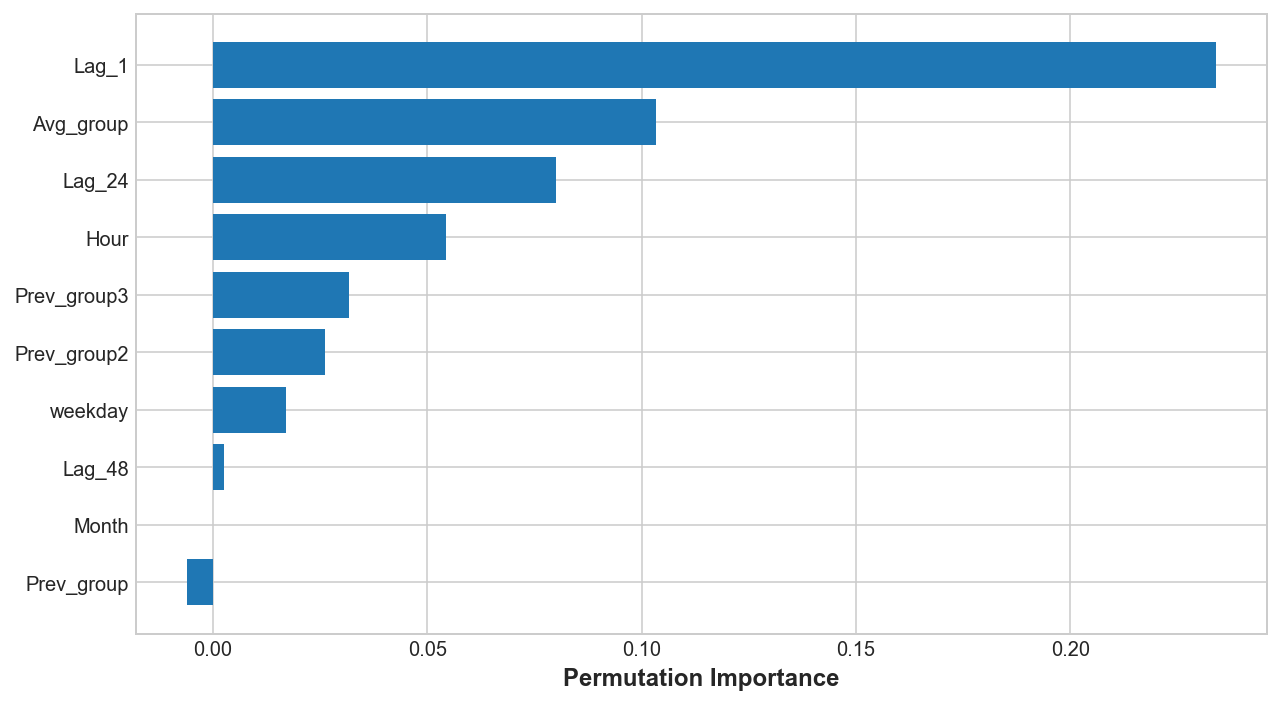

In [133]:
from sklearn.inspection import permutation_importance
perm_imp = permutation_importance(model, X_valid, y_valid)

sorted_idx = perm_imp.importances_mean.argsort()
plt.barh(X_valid.columns[sorted_idx], perm_imp.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

# Time series forecasting

First, fit a trend, seasonal, cyclical model to the number of orders.

In [16]:
d1_tot = d1.num_orders.to_frame()
d1_tot["Time"] = np.arange(len(d1_tot.index))
d1_tot.head()

num_orders  Time
Date                                 
2018-01-03 00:00:00       124.0     0
2018-01-03 01:00:00        85.0     1
2018-01-03 02:00:00        71.0     2
2018-01-03 03:00:00        66.0     3
2018-01-03 04:00:00        43.0     4

# Simple trend model

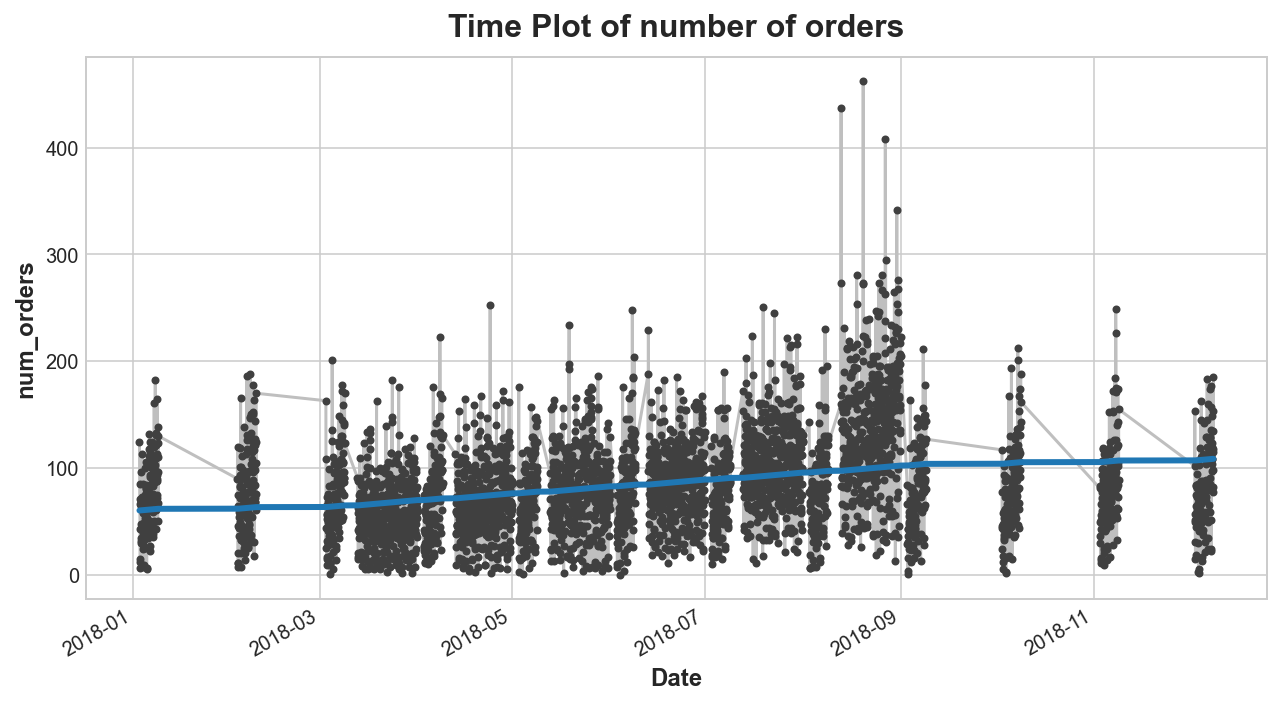

In [217]:
from sklearn.linear_model import LinearRegression

# Training data
X = d1_tot.loc[:, ['Time']]      # features
y = d1_tot.loc[:, 'num_orders']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index = X.index)

ax = y.plot(**plot_params, ylabel = "Orders")
ax = y_pred.plot(ax = ax, linewidth = 3)
ax.set_title('Time plot of number of orders');

Plot the detrended series:

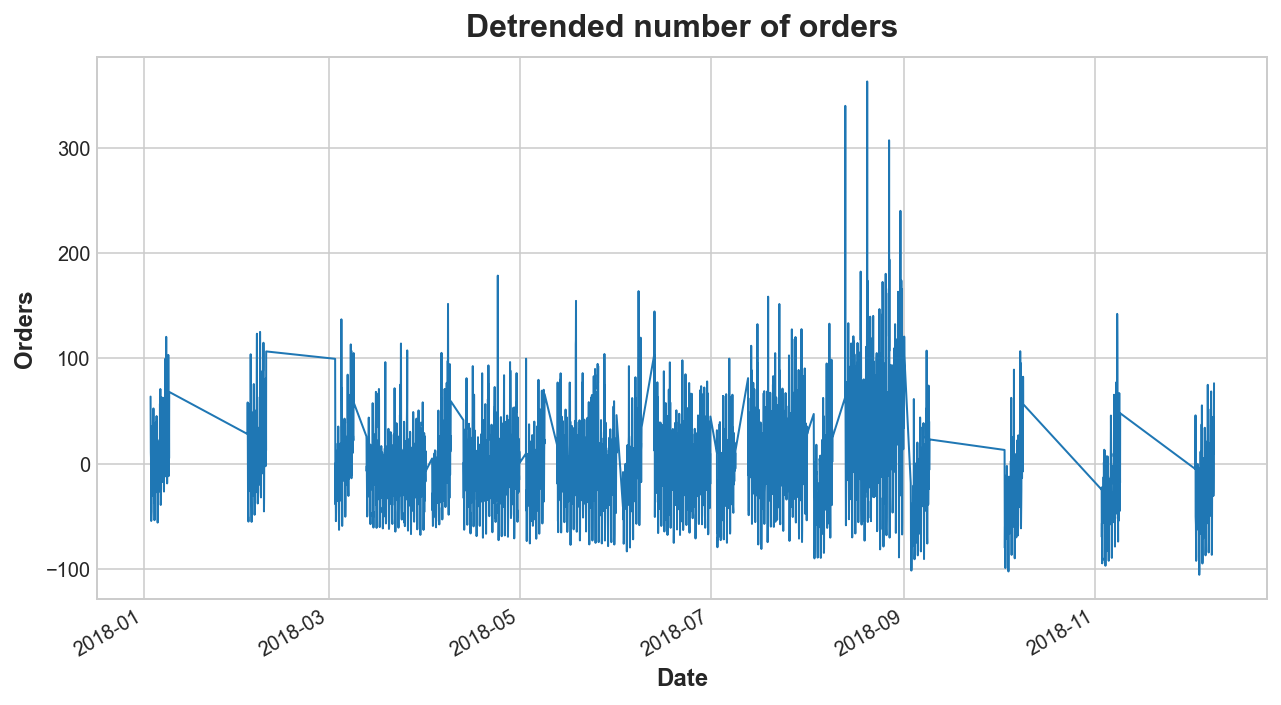

In [218]:
ax = (y - y_pred).plot(linewidth = 1, ylabel = "Orders")
ax.set_title("Detrended number of orders");

In [221]:
rmse = ((y-y_pred)**2).mean()**0.5
print(f'Baseline RMSE is equal to: {rmse:.3f}.')

Baseline RMSE is equal to: 42.797.


# Lag based linear regression

Build a regression model on its lag variables to analyse any lag-specific time dependencies.

In [20]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in lags
        },
        axis = 1)

In [241]:
X = d1.num_orders.copy()
X = make_lags(X, [1])

X = X.loc[:, "y_lag_1"]
X.dropna(inplace = True)           # drop missing values in the feature set
y = d1_tot.loc[:, 'num_orders']    # create the target
y, X = y.align(X, join = 'inner')  # drop corresponding values in target
X = X.to_frame()
y = y.to_frame()

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.plot(X['y_lag_1'], y, '.', color = '0.25')
ax.plot(X['y_lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Orders')
ax.set_xlabel('Lag_1')
ax.set_title('Lag 1 plot against number of orders');

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

RMSE: 35.453


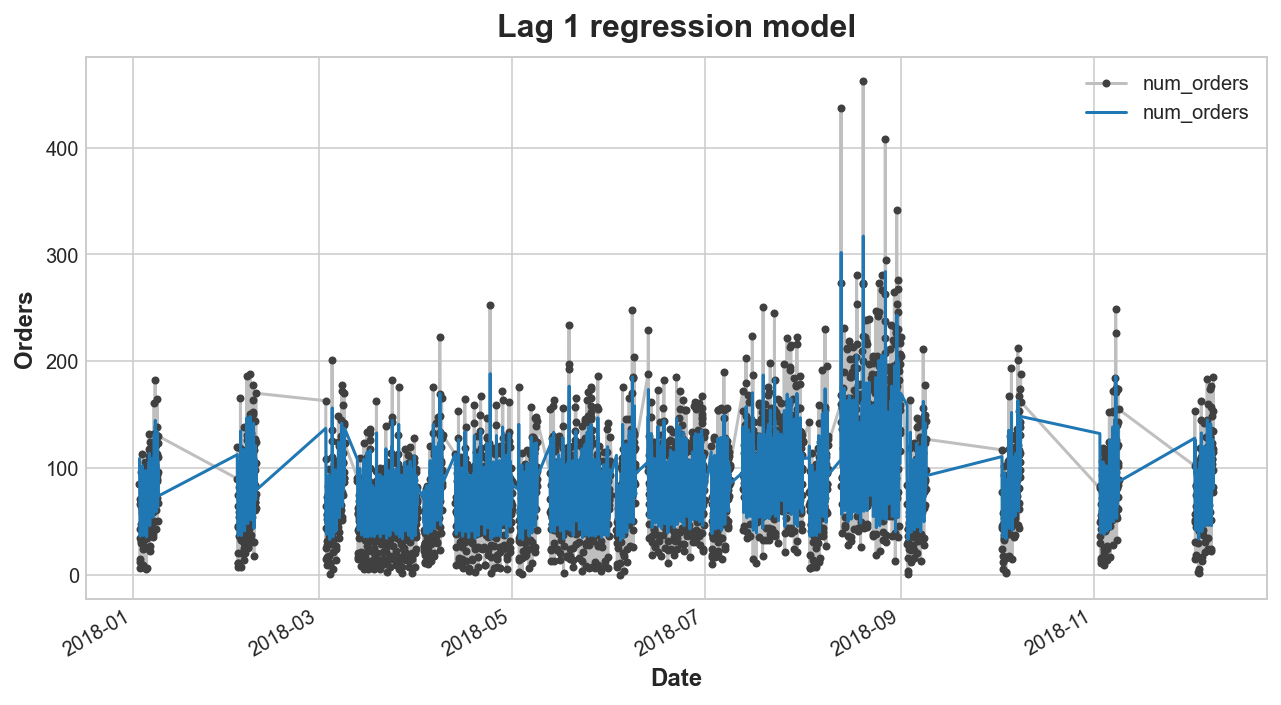

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error

ax = y.plot(**plot_params, ylabel = "Orders")
ax.set_title('Lag 1 regression model')

y_pred = pd.DataFrame(y_pred)
y_pred.index = y.index
y_pred.columns = y.columns
ax = y_pred.plot(ax = ax)

rmse = mean_squared_error(y, y_pred) ** 0.5
print(f'RMSE: {rmse:.3f}')

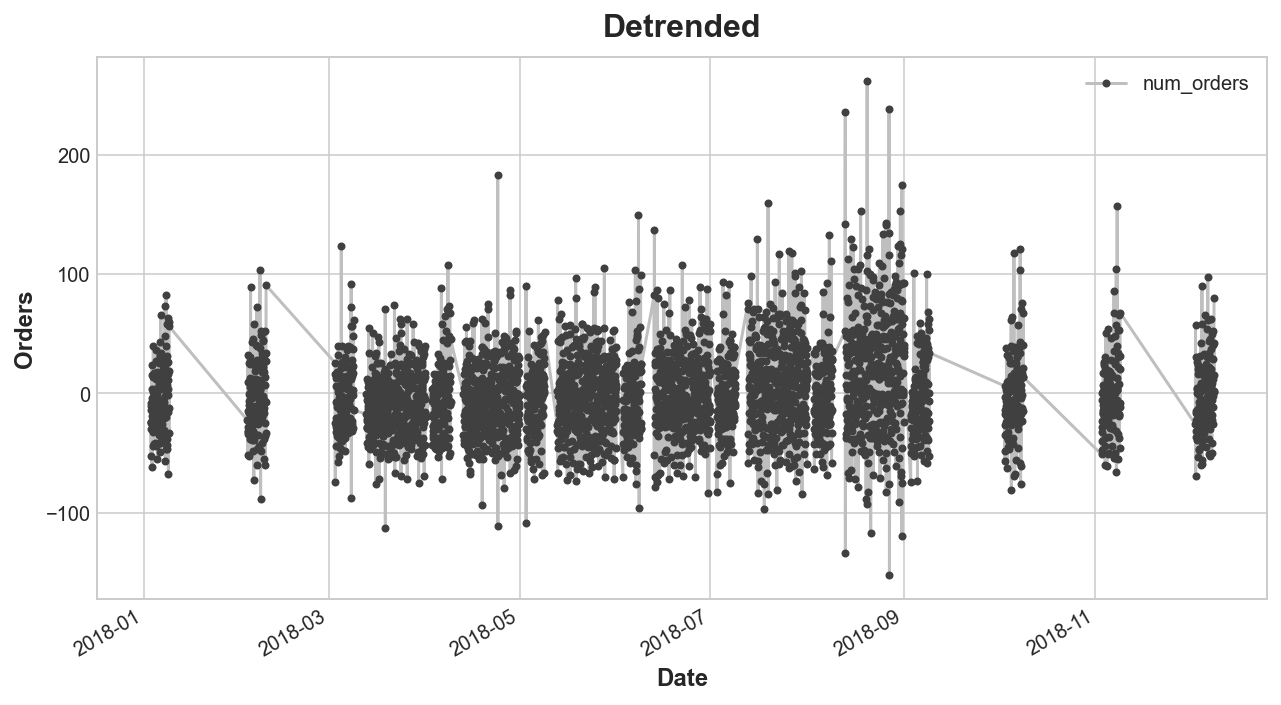

In [244]:
detrended = y - y_pred
ax = detrended.plot(**plot_params, ylabel = "Orders", title = "Detrended")

The regression on the lag 1 was fairly strong. Let's take a look at other lags and the ACF/PACFs.

In [23]:
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def lagplot(x, y = None, lag = 1, standardize = False, ax = None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha = 0.75,
        s = 3,
    )
    line_kws = dict(color = 'C3', )
    ax = sns.regplot(x = x_,
                     y = y_,
                     scatter_kws = scatter_kws,
                     line_kws = line_kws,
                     lowess = True,
                     ax = ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop = dict(size = "large"),
        frameon = True,
        loc = "upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title = f"Lag {lag}", xlabel = x_.name, ylabel = y_.name)
    return ax

def plot_lags(x, y = None, lags = 6, nrows = 1, lagplot_kwargs = {}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex = True, sharey = True, squeeze = False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag = k + 1, ax = ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict = dict(fontsize = 14))
            ax.set(xlabel = "", ylabel = "")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel = x.name)
    plt.setp(axs[:, 0], ylabel = y.name if y is not None else x.name)
    fig.tight_layout(w_pad = 0.1, h_pad = 0.1)
    return fig

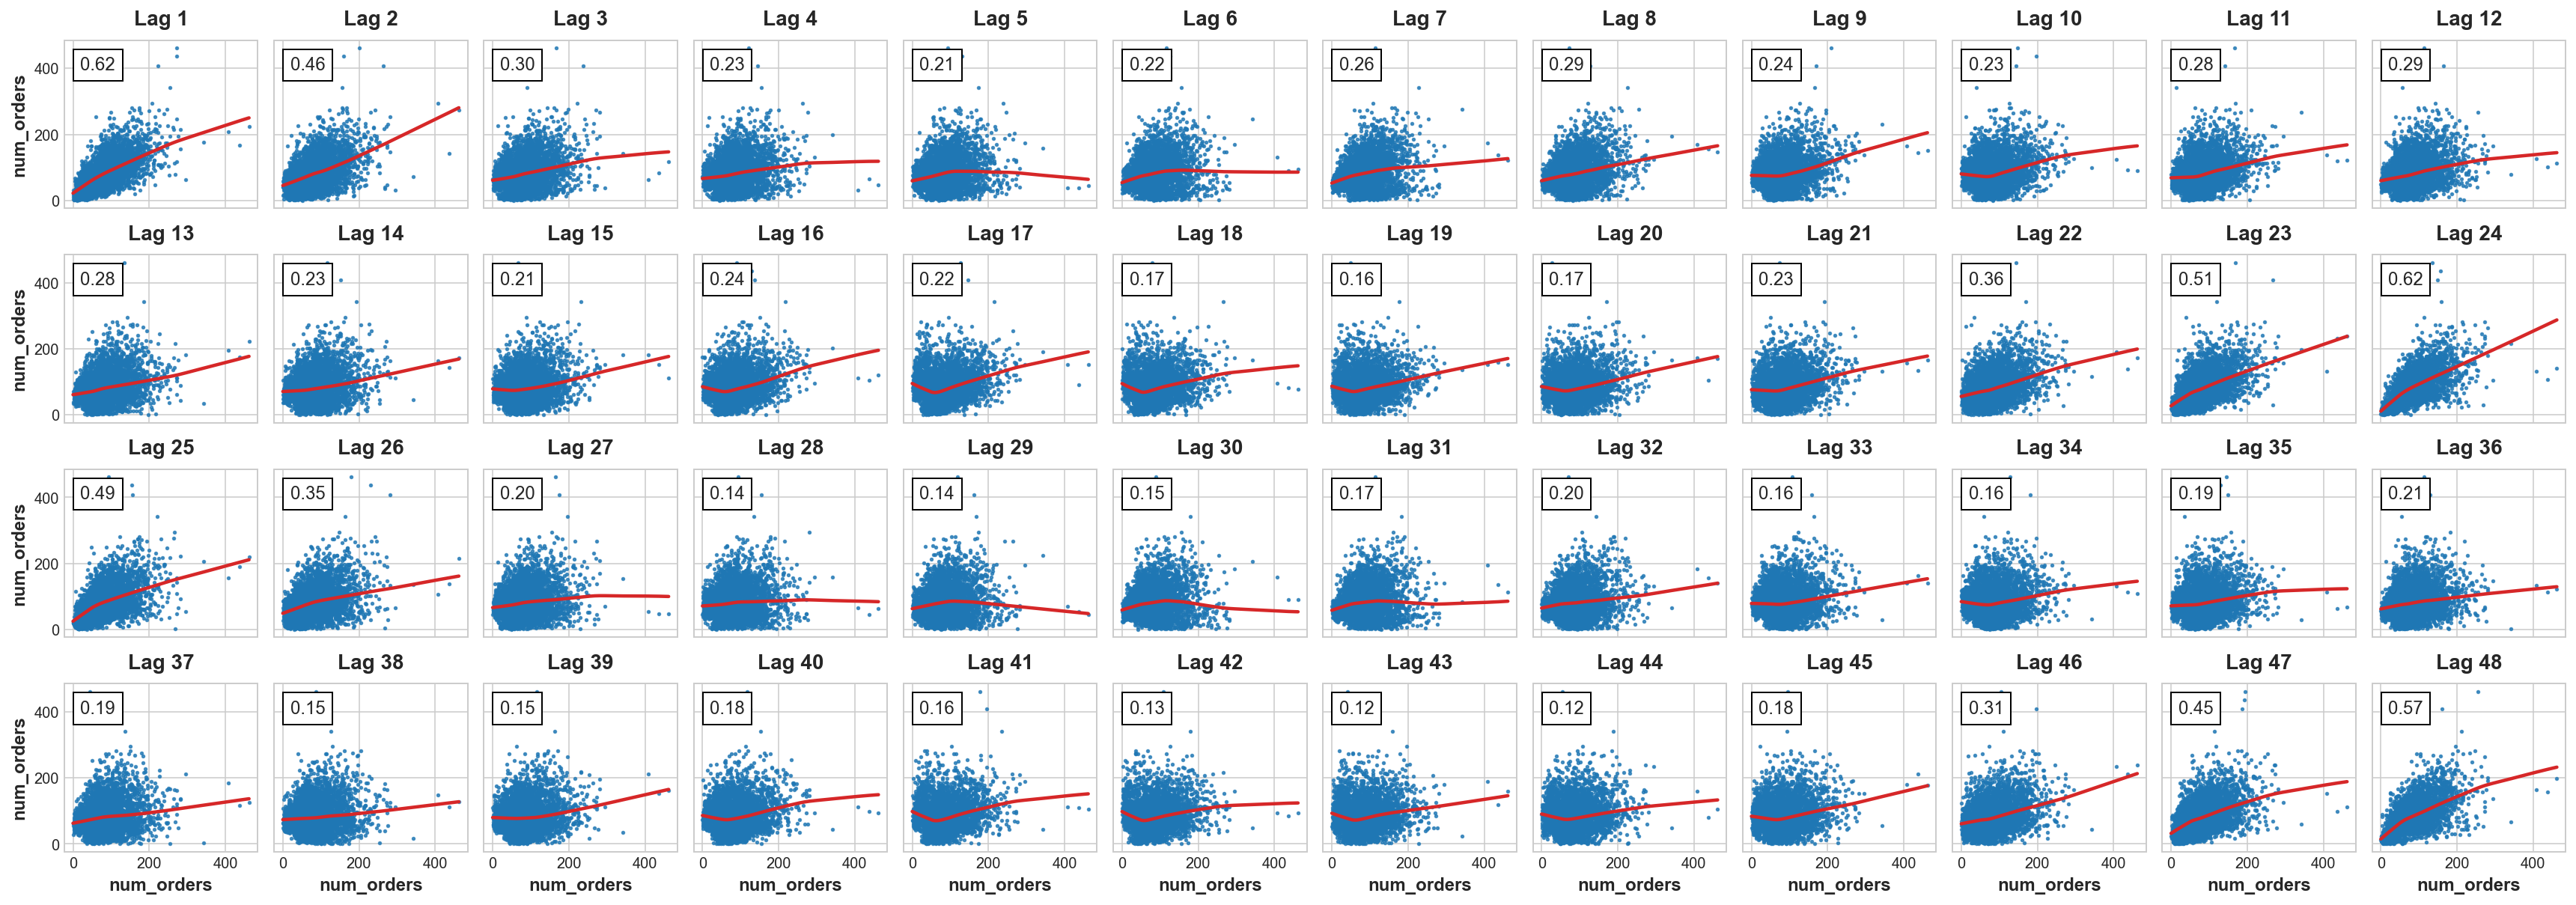

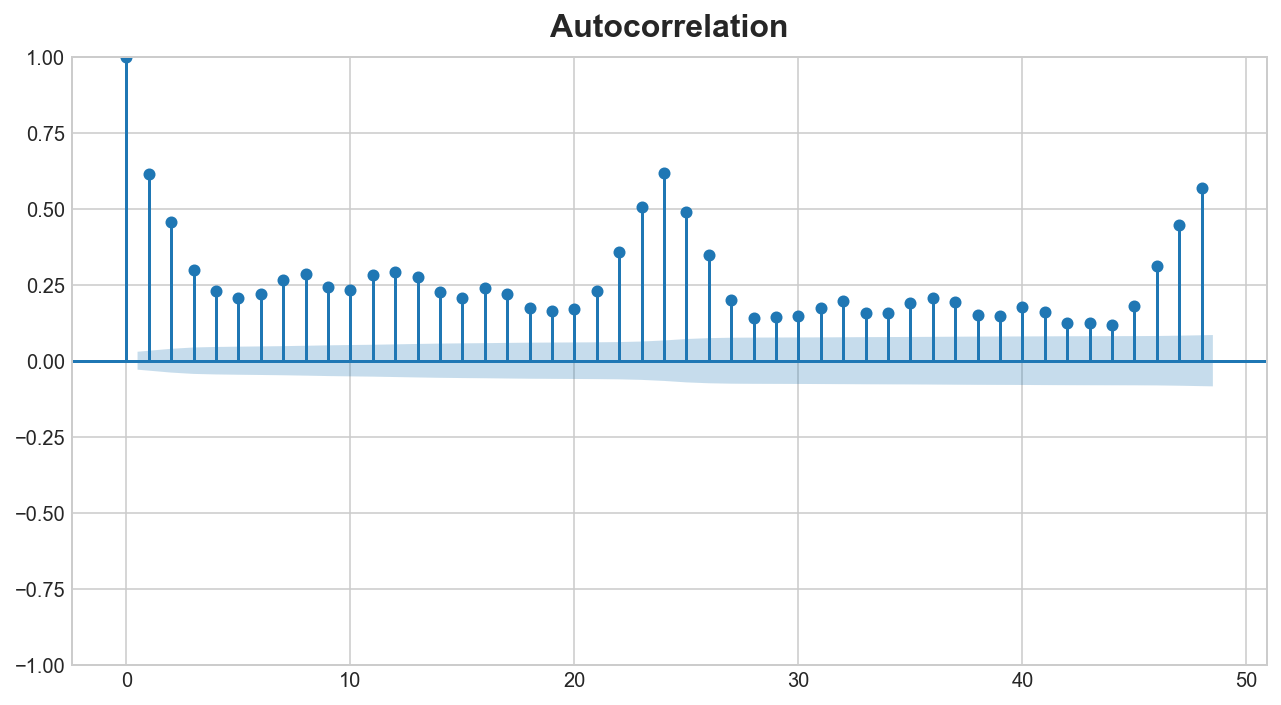

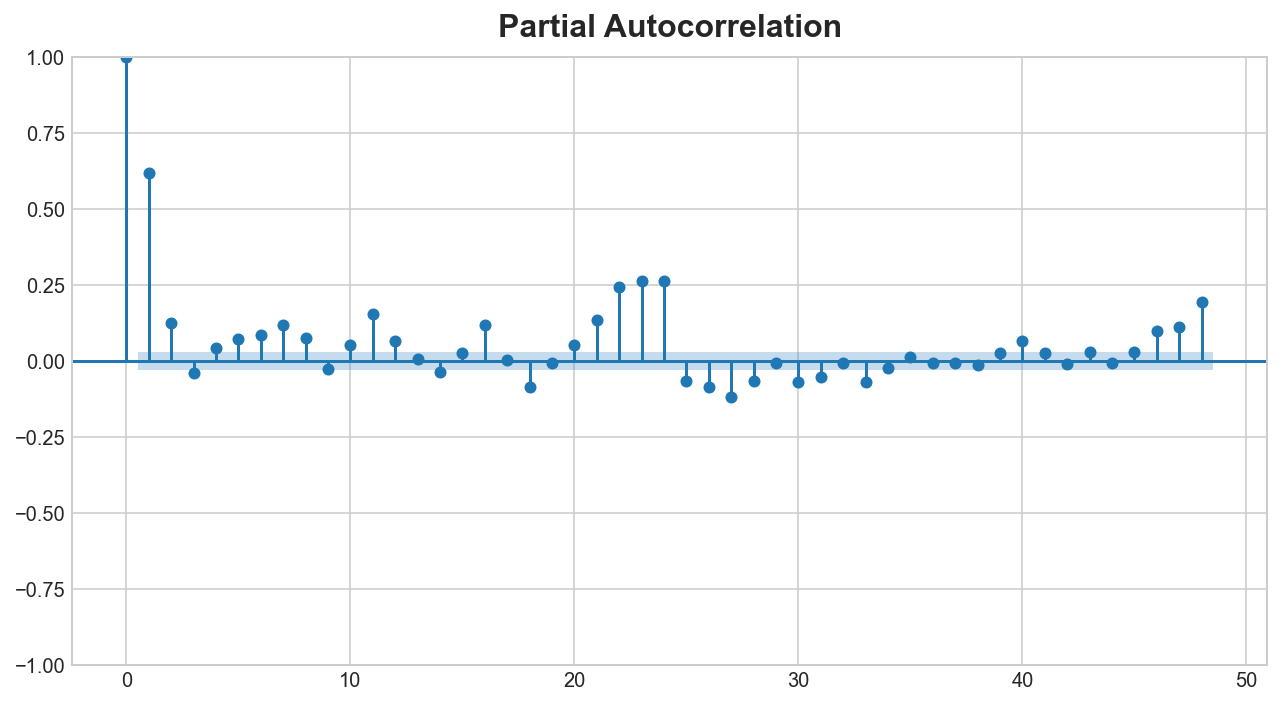

In [24]:
y = d1_tot.loc[:, 'num_orders']  
_ = plot_lags(y, lags = 48, nrows = 4)
#plt.savefig('int_cyclical_lagtrue.png', bbox_inches = 'tight')
_ = plot_acf(y, lags = 48)
_ = plot_pacf(y, lags = 48)
#plt.savefig('int_cyclical_lagpcftrue.png', bbox_inches = 'tight')

In [245]:
y = d1_tot.num_orders.copy()
X = make_lags(y, lags = [1, 24, 48]).dropna()
y, X = y.align(X, join = 'inner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

rmse_train = mean_squared_error(y_train, y_pred) ** 0.5
rmse_valid = mean_squared_error(y_test, y_fore) ** 0.5
print(f'Training RMSLE: {rmse_train:.5f}')
print(f'Validation RMSLE: {rmse_valid:.5f}')

Training RMSLE: 30.53016
Validation RMSLE: 32.35004


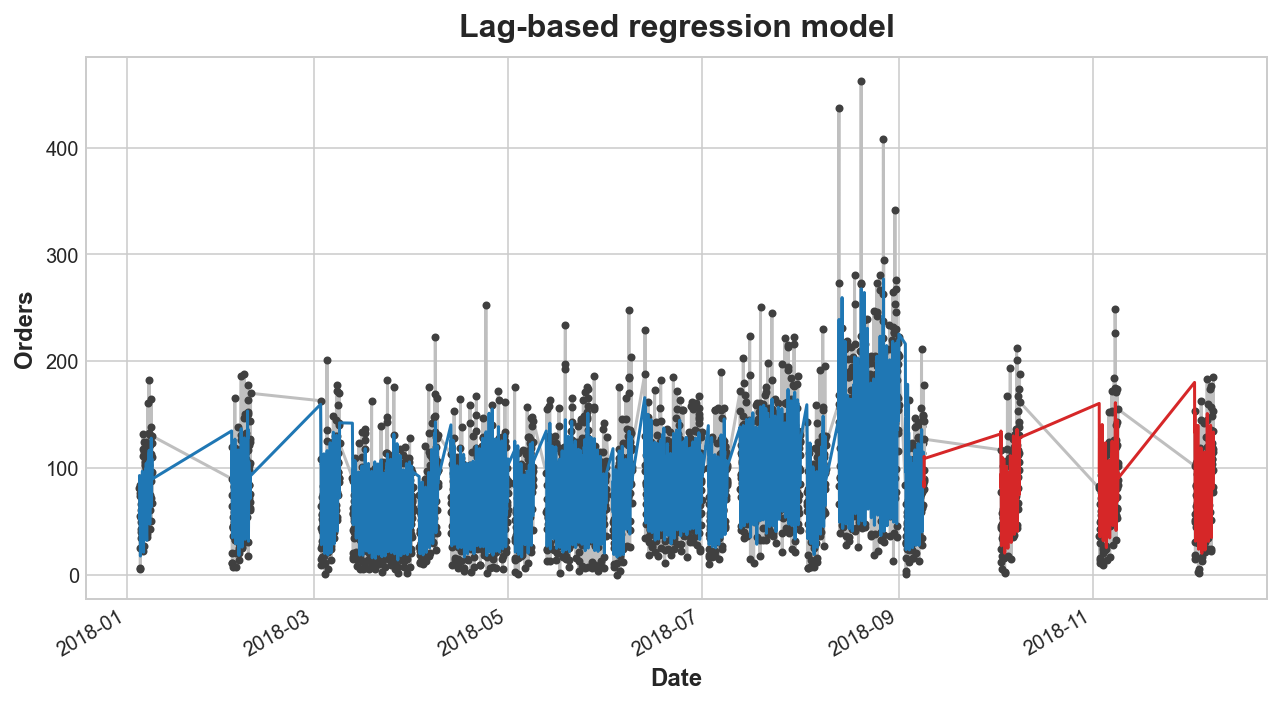

In [246]:
ax = y_train.plot(**plot_params, ylabel = "Orders", title = "Lag-based regression model")
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax = ax)
_ = y_fore.plot(ax = ax, color = 'C3')

In [249]:
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index = y.index)

rmse_train = mean_squared_error(y, y_pred) ** 0.5

print(f'Training RMSE: {rmse_train:.5f}')
ax = y.plot(**plot_params, title = "Lag model fit", ylabel = "Orders")
ax = y_pred.plot(ax = ax)
#plt.savefig('int_lag_fit.png', bbox_inches = 'tight')

Training RMSE: 30.70466


Using various lags we got some more predictive power. Now let's instead explore trend-seasonal-cyclical model to find a better fit.

# Explore trend-seasonal-cyclical models

Build a trend model for the data using only the time as input.

In [251]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=d1_tot.index,  
    constant = True,       
    order = 1,             
    drop = True,           
)

X = dp.in_sample()

In [253]:
from sklearn.linear_model import LinearRegression

y = d1_tot["num_orders"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.

model = LinearRegression(fit_intercept = False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

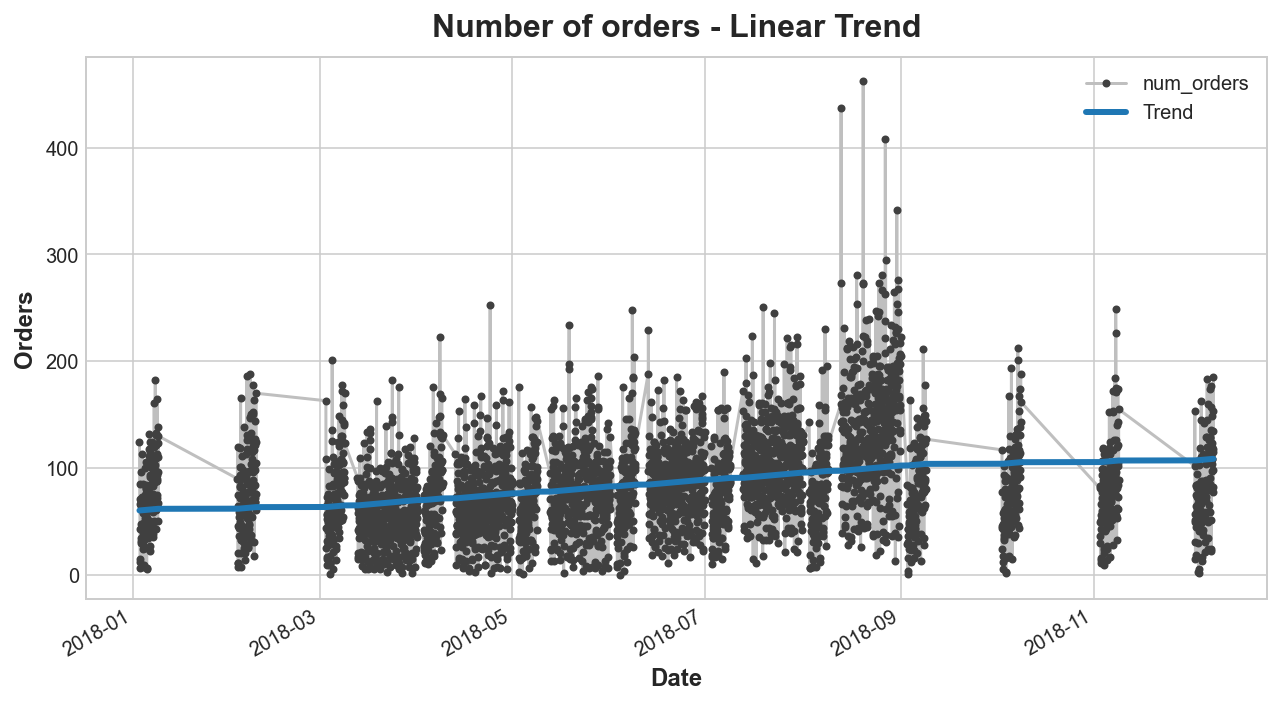

In [262]:
ax = d1_tot.num_orders.plot(**plot_params, title = "Number of orders - Linear Trend", ylabel = "Orders")
_ = y_pred.plot(ax=ax, linewidth=3, label = "Trend")
_ = ax.legend()
#plt.savefig('int_trend_model.png', bbox_inches = 'tight')

In [263]:
y_detrended = y - y_pred

y_detrended.plot(**plot_params, title = "Detrended number of orders", ylabel = "Orders");
#plt.savefig('int_detrended.png', bbox_inches = 'tight')

# Trend + Seasonal Model

Introduce seasonality to the model through dummy variables in the monthly data + looking for Fourier features.

In [34]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype = np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

def seasonal_plot(X, y, period, freq, ax = None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors = X[period].nunique(),)
    ax = sns.lineplot(
        x = freq,
        y = y,
        hue = period,
        data = X,
        ci = False,
        ax = ax,
        palette = palette,
        legend = False,
    )
    ax.set_title(f"Seasonal Plot ({period} / {freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy = (1, y_),
            xytext = (6, 0),
            color = line.get_color(),
            xycoords = ax.get_yaxis_transform(),
            textcoords = "offset points",
            size = 14,
            va = "center",
        )
    return ax

def plot_periodogram(ts, detrend = 'linear', ax = None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1h")
    freqencies, spectrum = periodogram(
        ts,
        fs = fs,
        detrend = detrend,
        window = "boxcar",
        scaling = 'spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color = "purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 52, 365, 8760])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Weekly (52)",
            "Daily (365)",
            "Hourly (8760)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis = "y", style = "sci", scilimits = (0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [267]:
X = d1_tot.copy()
X["year"] = X.index.year
X["month"] = X.index.month
X["weekday"] = X.index.weekday
X["hour"] = X.index.hour
X.num_orders = X.num_orders - y_pred

In [270]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
seasonal_plot(X, y = "num_orders", period = "month", freq = "hour", ax = ax);
#plt.savefig('int_seasonality_analysis.png', bbox_inches = 'tight')

We see strong seasonality in the data around May-June and November-December.

In [271]:
plot_periodogram(X.num_orders);
#plt.savefig('int_periodogram.png', bbox_inches = 'tight')

Similarly, we see two important seasonal elements: semi-annual seasonality and a small quarterly seasonality. For this let's add dummy variables to account for monthly elements and find the seasonal pattern in the data.

In [272]:
from statsmodels.tsa.deterministic import Fourier, Seasonality, TimeTrend

four = Fourier(period = 184, order = 1)
seas = Seasonality(period = 24)

dp = DeterministicProcess(
    index = d1_tot.index,
    constant = True,               # dummy feature for bias (y-intercept)
    order = 1,                     # trend (order 1 means linear)
    seasonal = False,              
    additional_terms=[seas, four],
    drop = True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()
y = d1_tot["num_orders"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

# Fit and predict
model = LinearRegression(fit_intercept = False)  
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

rmse_train = mean_squared_error(y_train, y_pred) ** 0.5
rmse_valid = mean_squared_error(y_test, y_fore) ** 0.5
print(f'Training RMSE: {rmse_train:.3f}')
print(f'Validation RMSE: {rmse_valid:.3f}')

Training RMSE: 32.517
Validation RMSE: 48.895


RMSE: 33.801


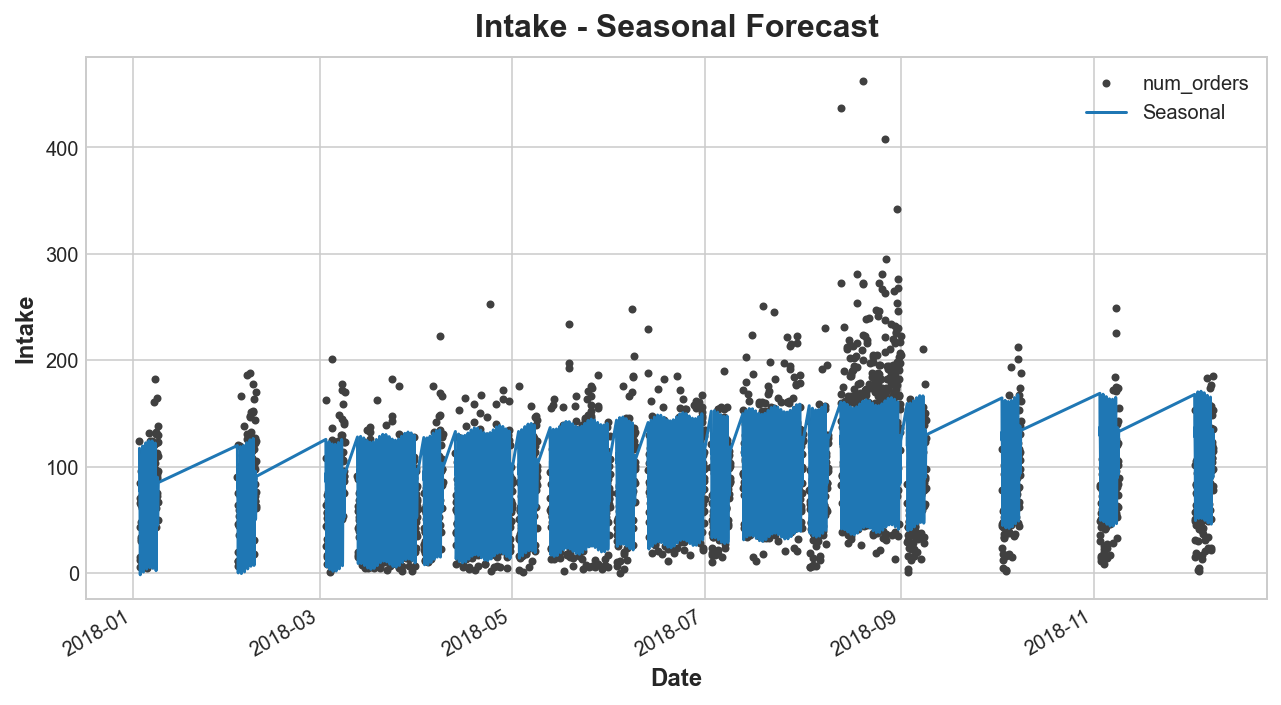

In [273]:
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = y.index)

ax = y.plot(color = '0.25', style = '.', title = "Number of orders - Seasonal Forecast", ylabel = "Orders")
ax = y_pred.plot(ax = ax, label = "Seasonal")
_ = ax.legend()

rmse = mean_squared_error(y, y_pred) ** 0.5
print(f'RMSE: {rmse:.3f}')
#plt.savefig('int_seasonalmodel_forecast.png', bbox_inches = 'tight')

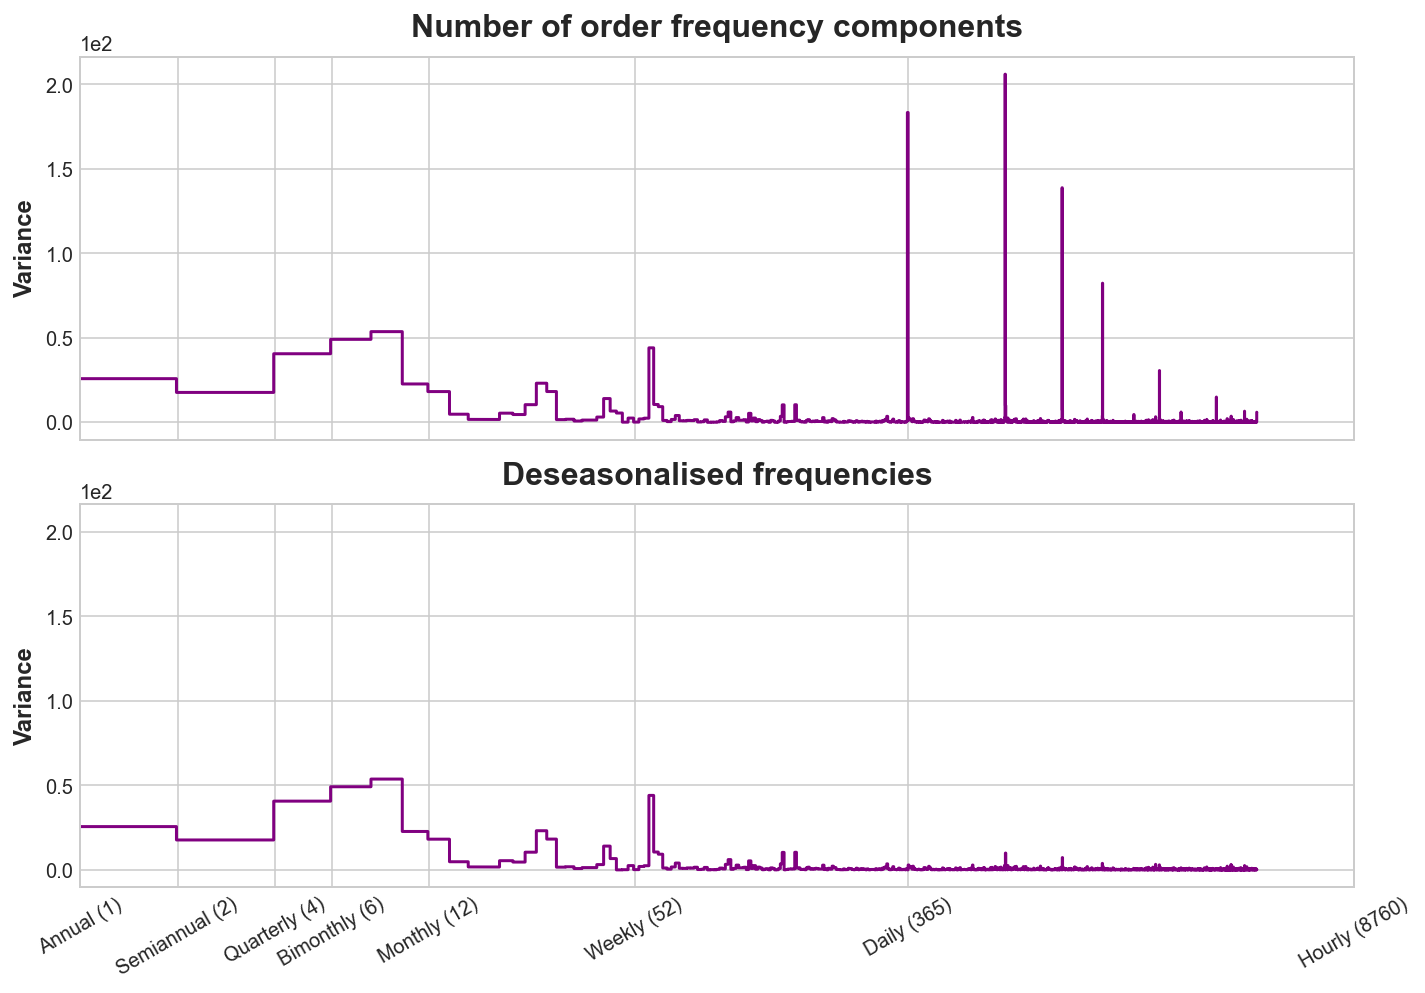

In [275]:
y_deseason = y - y_pred

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (10, 7))
ax1 = plot_periodogram(y, ax = ax1)
ax1.set_title("Number of order frequency components")
ax2 = plot_periodogram(y_deseason, ax = ax2);
ax2.set_title("Deseasonalised frequencies");
#plt.savefig('int_periodogram_deseasonalised.png', bbox_inches = 'tight')

We have accounted for all the seasonality in the data as the periodogram is flat.

In [276]:
y_deseason.plot(**plot_params, title = "Detrended and deseasonalised orders", ylabel = 'Orders');
#plt.savefig('deseasoned_detrended_int.png', bbox_inches = 'tight')

# Trend + Seasonality + Cyclical Model

In [277]:
from sklearn.metrics import mean_squared_log_error

four = Fourier(period = 184, order = 4)
seas = Seasonality(period = 24)

dp = DeterministicProcess(
    index = d1_tot.index,
    constant = True,               # dummy feature for bias (y-intercept)
    order = 1,                     # trend (order 1 means linear)
    seasonal = False,               # monthly seasonality (indicators)
    additional_terms = [four, seas],
    drop = True,                   # drop terms to avoid collinearity
)

X_time = dp.in_sample()

y = d1_tot.num_orders.copy()

model = LinearRegression(fit_intercept = False)
_ = model.fit(X_time, y)

y_pred = pd.Series(model.predict(X_time), index = y.index)
X_fore = dp.out_of_sample(steps = 240)
X_fore.index = pd.period_range("2018-12-09", freq = "H", periods = 240)
y_fore = pd.Series(model.predict(X_fore), index = X_fore.index)

y_deseason = y - y_pred

X_lags = make_lags(y_deseason, lags = [1, 24, 48])
X = pd.concat([X_lags, X_time], axis=1).dropna()
y, X = y.align(X, join = 'inner')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, shuffle = False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index = X_train.index).clip(0.0)
y_pred = pd.Series(model.predict(X_valid), index = X_valid.index).clip(0.0)

rmse_train = mean_squared_error(y_train, y_fit) ** 0.5
rmse_valid = mean_squared_error(y_valid, y_pred) ** 0.5
print(f'Training RMSE: {rmse_train:.3f}')
print(f'Validation RMSE: {rmse_valid:.3f}')

ax = y.plot(**plot_params, alpha=0.5, title = "Number of orders", ylabel = "Orders")
ax = y_fit.plot(ax=ax, label="Fitted", color = 'C0')
ax = y_pred.plot(ax=ax, label="Forecast", color = 'C3')
ax.legend();
#plt.savefig('int_final_trendmodel.png', bbox_inches = 'tight')

Training RMSE: 28.150
Validation RMSE: 31.530


# Hybrid Models

Given that we need a model that forecasts months forward, the natural next step is a hybrid model: first build a trend-based linear regression model to capture (and to forecast later) future elements and trends and then build a decision tree-based model (XGBRegressor) to capture interaction terms and seasonality. 

In [278]:
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method

def fit(self, X_1, X_2, y):
    self.model_1.fit(X_1, y)

    y_fit = pd.DataFrame(
        self.model_1.predict(X_1),
        index = X_1.index, columns = y.columns,
    )

    y_resid = y - y_fit
    y_resid = y_resid#.stack(["Month", "weekday", "Hour"]).squeeze() # wide to long

    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = y.columns
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid

# Add method to class
BoostedHybrid.fit = fit

def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        self.model_1.predict(X_1),
        index = X_1.index, columns = self.y_columns,
    )
    #y_pred = y_pred.stack(["Month", "weekday", "Hour"]).squeeze()  # wide to long

    y_pred += self.model_2.predict(X_2).reshape(len(X_2), 1)
    
    return y_pred#.unstack(["Month", "weekday", "Hour"])  # long to wide


# Add method to class
BoostedHybrid.predict = predict

Explore various lag terms, such as Lag 1, 6 and 12.

In [282]:
d1_tot = d1.num_orders.to_frame()
d1_tot["Lag_1"] = d1.num_orders.shift(1)
d1_tot["Lag_24"] = d1.num_orders.shift(24)
d1_tot["Lag_48"] = d1.num_orders.shift(48)
d1_tot.dropna(inplace = True)

In [283]:
# Target series
y = d1_tot.loc[:, 'num_orders']

# X_1: Features for Linear Regression
dp = DeterministicProcess(index = y.index, order = 1)
X_1 = dp.in_sample()

# X_2: Features for XGBoost
X_2 = d1_tot
X_2 = X_2.reset_index("Date")

for column in X_2.select_dtypes(include = ['object', 'category']).columns:
    one_hot = pd.get_dummies(X_2[column])
    X_2 = X_2.drop(column,axis = 1)
    X_2 = X_2.join(one_hot)

# Label encoding for seasonality
X_2 = X_2.set_index("Date")
X_2["Month"] = X_2.index.month
X_2["weekday"] = X_2.index.weekday
X_2["Hour"] = X_2.index.hour
X_2.drop("num_orders", axis = 1, inplace = True)
X_2.head()

Lag_1  Lag_24  Lag_48  Month  weekday  Hour
Date                                                            
2018-01-05 00:00:00   80.0    85.0   124.0      1        4     0
2018-01-05 01:00:00   81.0    42.0    85.0      1        4     1
2018-01-05 02:00:00   74.0    34.0    71.0      1        4     2
2018-01-05 03:00:00   55.0    24.0    66.0      1        4     3
2018-01-05 04:00:00   84.0    39.0    43.0      1        4     4

Choose hybrid model elements:

In [284]:
# Further model 1 candidates
from sklearn.linear_model import ElasticNet, Lasso, Ridge

# Further model 2 candidates
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

model = BoostedHybrid(
    model_1 = LinearRegression(),
    model_2 = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 7, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:squarederror', subsample = 0.7),
)

Validate the model fit on the last 6 months of data.

In [285]:
y = pd.DataFrame(y)
y_train, y_valid = y[:"2018-10-01"], y["2018-10-01":]
X1_train, X1_valid = X_1[: "2018-10-01"], X_1["2018-10-01" :]
X2_train, X2_valid = X_2.loc[:"2018-10-01"], X_2.loc["2018-10-01":]

model.fit(X1_train, X2_train, y_train)
y_fit = model.predict(X1_train, X2_train).clip(0.0)
y_pred = model.predict(X1_valid, X2_valid).clip(0.0)

rmse_train = mean_squared_error(y_train, y_fit) ** 0.5
rmse_valid = mean_squared_error(y_valid, y_pred) ** 0.5
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')

Training RMSE: 7.58310
Validation RMSE: 31.27149


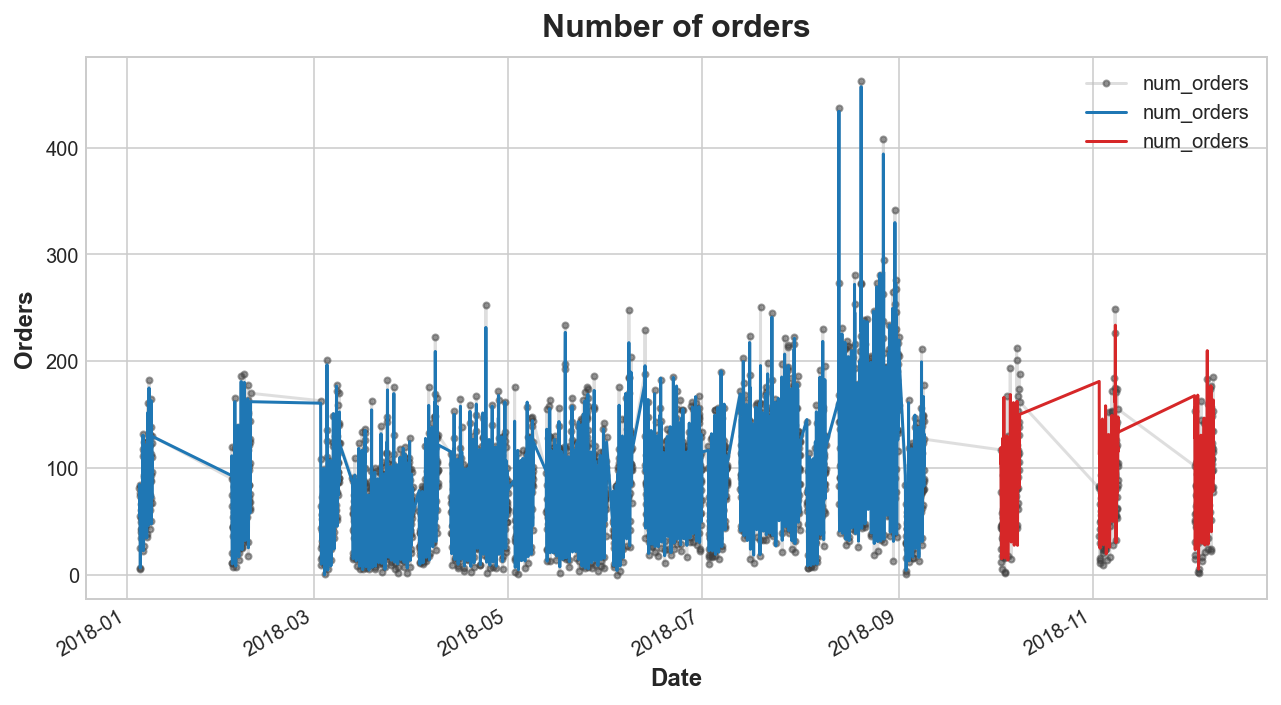

In [287]:
y_plot = y.rename(columns  = {0: "num_orders"})
y_fit_plot = y_fit.rename(columns  = {0: "Fitted"})
y_pred_plot = y_pred.rename(columns  = {0: "Predicted"})

ax = y_plot.plot(**plot_params, alpha = 0.5, title = "Number of orders", ylabel = "Orders")
ax = y_fit_plot.plot(ax = ax, label = "Fitted", color = 'C0')
ax = y_pred_plot.plot(ax = ax, label = "Forecast", color = 'C3');
#plt.savefig('int_final_hybridmodel_fit.png', bbox_inches = 'tight')

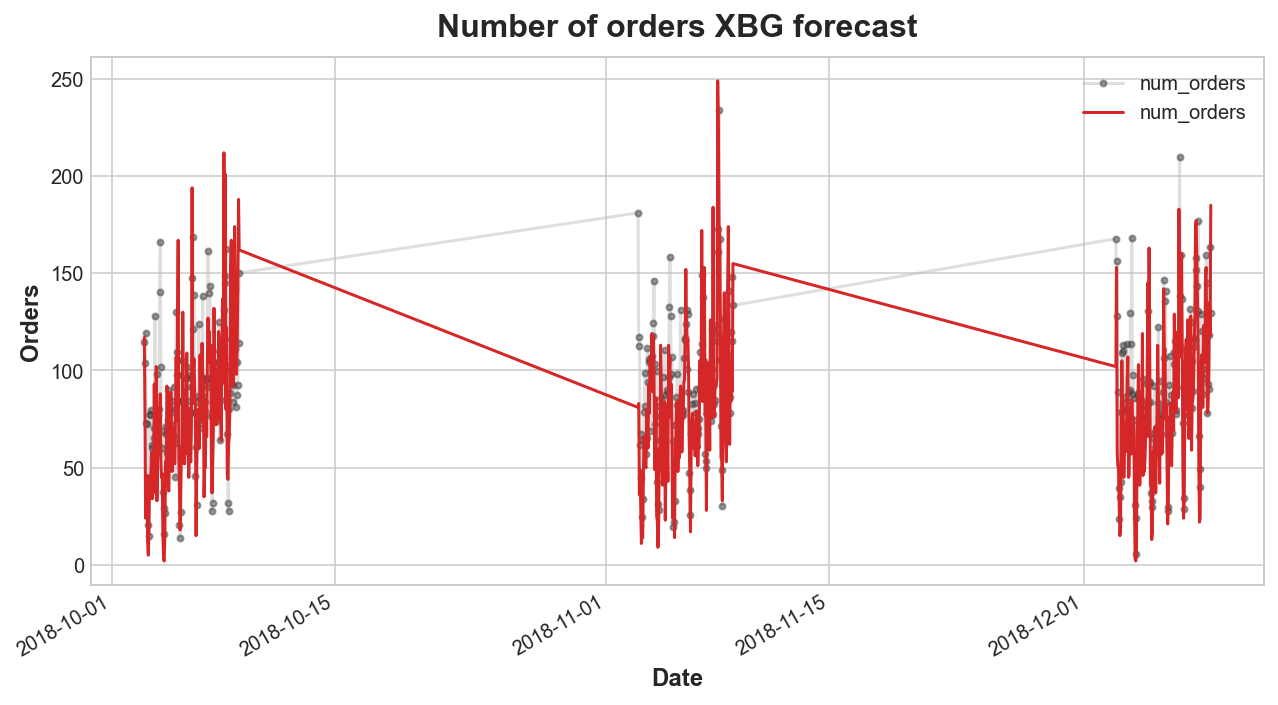

In [288]:
ax = y_pred_plot.plot(**plot_params, alpha = 0.5, title = "Number of orders XBG forecast", ylabel = "Orders")
ax = y_valid.plot(ax = ax, label = "Forecast", color = 'C3');

In [289]:
import seaborn as sns
data = y_valid-y_pred
sns.boxplot(data = data)
plt.title("Boxplot of residuals");

# Linear tree model

Explore also another approach: a linear tree based model. Basic idea is to build a simple linear regression model for each weekday and hour combination using a Lag_24 data as our feature. 

In [290]:
groupby_list = list(d1_lt.groupby(['Hour', 'weekday']).groups.keys())

def predict(data, group_by, ridge_coef):
    """
    Given, a data point, the groups by which we split and the regression coefficients, this function returns a prediction
    """
    group = tuple(data[group_by])
    idx = groupby_list.index(group)
    (inter,slope) = ridge_coef.iloc[idx]
    return inter + slope * data['Lag_24']
    #return inter + sum(slope*data.drop(["num_orders", "Hour", "weekday"]))

def RMSE_error(data, forecast):
    """
    This function gives the RMSE for the forecats
    """
    return np.sqrt((1 / data.shape[0]) * np.sum(np.square(data - forecast)))

def pred_interval(prediction, test_data, test_predictions, alpha = 0.95):
    """
    Obtain the prediction interval for each of the prediction
    Input: single prediction, entire test data, test set predictions
    Output: Prediction intervals and the actual prediction
    """
    y_test = test_data['num_orders']
    test_predictions = np.array(test_predictions)
    err = np.sum(np.square((y_test - test_predictions)))
    std = np.sqrt((1 / (y_test.shape[0] - 2)) * err)
    z = stats.norm.ppf(1 - (1 - alpha) / 2)
    interval = z * std
    
    return [float(prediction-interval), float(prediction), float(prediction + interval)]

def Ridge_error(data):
    """
    Based on the provided data, this function returns the training error while performing ridge regression
    """
    x = data['Lag_24'].values.reshape(-1, 1)
    y = data['num_orders'].values.reshape(-1, 1)
    model = Ridge().fit(x,y)
    train_error = np.sqrt((1 / y.shape[0]) * np.sum(np.square(np.squeeze(model.predict(x)) - y.T)))
    return (round(float(train_error), 3))

def Ridge_model(data):
    """
    Based on the provided data, this function returns the 
    coefficients of the ridge regression.
    
    input: the training data
    output: ridge regression coefficients
    
    """
    
#     y = data.pop('num_orders')
#     y = y.values
#     data.pop('Hour')
#     data.pop('weekday')
#     x = data.values
    
    data = data.sample(frac = 1,random_state = 42)
    x = data['Lag_24'].values.reshape(-1, 1)
    y = data['num_orders'].values.reshape(-1, 1)
    model = Ridge().fit(x, y)
    return (round(float(model.intercept_), 3), (round(float(model.coef_), 3)))

In [291]:
data_train = d1_lt.loc[:"2018-10-01"]
data_valid = d1_lt.loc["2018-10-01":]

ridge_coef = data_train.groupby(['Hour', 'weekday']).apply(Ridge_model)
display(pd.DataFrame(ridge_coef, columns = ['Regression Coefficients (Intercept,Slope)']))

Regression Coefficients (Intercept,Slope)
Hour weekday                                          
0    0                                (122.838, 0.309)
     1                                 (53.005, 0.435)
     2                                 (69.843, 0.533)
     3                                (100.438, 0.361)
     4                                  (4.167, 1.021)
...                                                ...
23   2                                 (54.853, 0.489)
     3                                 (44.629, 0.622)
     4                                 (56.739, 0.576)
     5                                 (63.447, 0.322)
     6                                 (60.182, 0.593)

[168 rows x 1 columns]

In [294]:
customers_fit = []
for i in range(data_train.shape[0]):
    customers_fit.append(predict(data_train.iloc[i], ['Hour', 'weekday'], ridge_coef))
print(f"The training RMSE is: {mean_squared_error(data_train['num_orders'], customers_fit) ** 0.5:.3f}")
      
customers_hat = []
for i in range(data_valid.shape[0]):
    customers_hat.append(predict(data_valid.iloc[i], ['Hour', 'weekday'], ridge_coef))
print(f"The validation RMSE is: {mean_squared_error(data_valid['num_orders'], customers_hat) ** 0.5:.3f}")

The training RMSE is: 28.630
The validation RMSE is: 39.886


The results were similar but the hybrid model had slightly better validation RMSLE. 

In [295]:
from scipy import stats

prediction_interval = []
for i in range(data_valid.shape[0]):
    prediction_interval.append(pred_interval(customers_hat[i], data_valid, customers_hat))
pred_int = pd.DataFrame(prediction_interval, columns = ['Lower','Actual','Upper'])
display(pred_int.head())

Lower   Actual       Upper
0   74.634893  152.991  231.347107
1    6.183893   84.540  162.896107
2  216.035893  294.392  372.748107
3   18.932893   97.289  175.645107
4   46.167893  124.524  202.880107

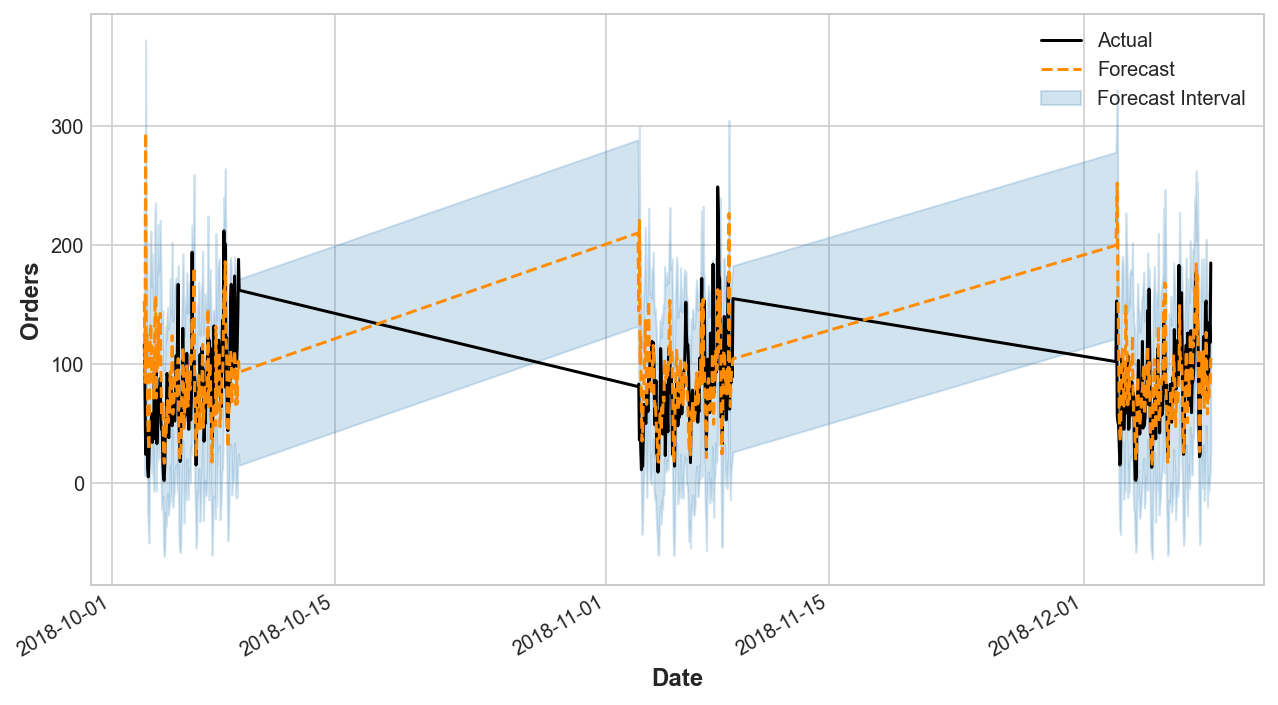

In [297]:
sns.lineplot(x = 'Date', y = 'num_orders', data = data_valid.reset_index(), label='Actual',color="black");
sns.lineplot(x = 'Date', y = 'Actual',  data = pred_int.set_index(data_valid.index).reset_index(), label='Forecast', color="darkorange", linestyle='dashed')
plt.fill_between(data_valid.index, pred_int['Lower'], pred_int['Upper'], label='Forecast Interval', color="tab:blue", alpha=0.2);
plt.gcf().autofmt_xdate();
plt.legend();
plt.ylabel('Orders');

# SARIMAX

In [298]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(data = d1.num_orders.values, index = pd.to_datetime(d1.index)).dropna()
result = seasonal_decompose(series.values, model = 'additive', period = 20)
result.plot()
plt.show()

In [320]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

vals = d1.num_orders.diff().dropna()
vals = vals - vals.mean()

results = kpss(vals)

print(f"KPSS Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[3].items():
    print("\t%s: %.3f" % (key, value))

KPSS Statistic: 0.06241278464773014
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [317]:
# For time series modeling
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Build model and print summary
ar1 = ARIMA(d1.num_orders, order = (2, 1, 2)).fit()
ar1.summary()

# Generate predictions
preds = ar1.fittedvalues

mean_squared_error(preds, d1.num_orders)**0.5

C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


34.40676129340446

In [312]:
X = d1.num_orders
mod = sm.tsa.SARIMAX(X, order=([1, 24, 48], 1, 3), trend='c')
res = mod.fit() 
sim = res.simulate(24, anchor='end', repetitions=10)

C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\pohlp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [313]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:                     num_orders   No. Observations:                 4416
Model:             SARIMAX([1, 24, 48], 1, 3)   Log Likelihood              -21459.079
Date:                        Sun, 01 May 2022   AIC                          42934.158
Time:                                13:52:03   BIC                          42985.300
Sample:                                     0   HQIC                         42952.196
                                       - 4416                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0338      0.145      0.232      0.816      -0.251       0.319
ar.L1          0.2551      0.031      8.134      0.000       0.194       0.317
ar.L24         0.2127      0.012     17.721      0.000       0.189       0.236
ar.L48         0.2230      0.014     15.856      0.000       0.195       0.251
ma.L1         -0.6798      0.034    -20.147      0.000      -0.746      -0.614
ma.L2          0.0477      0.019      2.516      0.012       0.011       0.085
ma.L3         -0.1035      0.014     -7.362      0.000      -0.131      -0.076
sigma2      1067.9687     16.051     66.535      0.000    1036.509    1099.429
===================================================================================
Ljung-Box (L1) (Q):                 133.16   Jarque-Bera (JB):              2221.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [314]:
# Generate predictions
preds = res.fittedvalues

mean_squared_error(preds, d1.num_orders)**0.5

31.211034917060097